# Google Analytics Customer Revenue

https://www.kaggle.com/competitions/ga-customer-revenue-prediction

## 1. Imports

### Import Libraries

In [522]:
import sys
import os 

import numpy as np # Arrays
import pandas as pd # Series and Dataframes

import matplotlib.pyplot as plt 
import seaborn as sns # Advanced Plotting 

pd.options.display.max_rows = 100
plt.style.use('ggplot') # Beautify Plots 

import random
import json 
from pandas import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb

RANDOM_STATE = 42

### Import Data 

In [523]:
## Función de lectura - El dataset está en formato json
columns = ['device', 'geoNetwork', 'totals'] # Columns with json format

p = 0.1 # Fraction of data to use

def json_read(df):
    data_frame = file_dir + df
    
    df = pd.read_csv(data_frame, 
                     #converts json object into something readable by Python (whatever is in "dict" is a column)
                     converters={column: json.loads for column in columns}, 
                     dtype={'fullVisitorId': 'str'}, 
                     skiprows=lambda i: i>0 and random.random() > p)
    
    for column in columns: 
      #converts each column
        column_as_df = json_normalize(df[column]) 
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df

In [524]:
file_dir = 'C:/Users/Usuario/OneDrive/Workplace/Portfolio_Projects/Google Analytics Customer Revenue Prediction/data/' #your path to the csv
file_name = 'GACR_def.csv'

In [525]:
%%time
random.seed(RANDOM_STATE)
df = json_read(file_name)

Loaded GACR_def.csv. Shape: (90249, 42)
CPU times: total: 4 s
Wall time: 8.76 s


## 2. Data Understanding - EDA

### 2.1 Analisis univariante

#### 2.1.1 Tamaño del dataset

In [526]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90249 entries, 0 to 90248
Columns: 42 entries, Unnamed: 0 to totals.transactionRevenue
dtypes: bool(1), int64(5), object(36)
memory usage: 28.3+ MB


#### 2.1.2 Visualización directa datos

In [527]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1,7,9,12,19
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
fullVisitorId,377306020877927890,537222803633850821,9499785259412240342,357659889600827884,3696906537737368442
sessionId,377306020877927890_1472880147,537222803633850821_1472812602,9499785259412240342_1472812272,357659889600827884_1472839882,3696906537737368442_1472856874
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472812602,1472812272,1472839882,1472856874
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472812602,1472812272,1472839882,1472856874
device.browser,Firefox,Chrome,Firefox,Safari,Chrome


In [528]:
df.set_index('sessionId', inplace=True)

In [529]:
df.head(2).T

sessionId,377306020877927890_1472880147,537222803633850821_1472812602
Unnamed: 0,1,7
channelGrouping,Organic Search,Organic Search
date,20160902,20160902
fullVisitorId,377306020877927890,537222803633850821
socialEngagementType,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472812602
visitNumber,1,1
visitStartTime,1472880147,1472812602
device.browser,Firefox,Chrome
device.browserVersion,not available in demo dataset,not available in demo dataset


In [530]:
### Borramos ids
#   A vece nos pueden ser útiles y por ejemplo, en este caso, si visitId se repite, no podría indicar el número de visitas de un cliente
#   en concretp, pero en este dataset, tenemos otro atributo, visitNumber que no da esa información
df_ids = ['fullVisitorId', 'visitId']
df.drop(df_ids, axis=1, inplace=True)

#### 2.1.3 Tipos de atributos disponibles , 2.1.4 Estadisticos descriptivos y 2.1.5. Numero de valores nulos

In [531]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90249.0,4.517847e+05,2.613238e+05,1.000000e+00,2.254420e+05,4.512880e+05,6.777830e+05,9.036510e+05
date,90249.0,2.016587e+07,4.697879e+03,2.016080e+07,2.016103e+07,2.017011e+07,2.017042e+07,2.017080e+07
visitNumber,90249.0,2.241920e+00,8.800759e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.930000e+02
visitStartTime,90249.0,1.484998e+09,9.021906e+06,1.470039e+09,1.477560e+09,1.483901e+09,1.492727e+09,1.501657e+09


In [532]:
df.describe(exclude=np.number).T

,count,unique,top,freq
channelGrouping,90249,8,Organic Search,37993
socialEngagementType,90249,1,Not Socially Engaged,90249
device.browser,90249,32,Chrome,62130
device.browserVersion,90249,1,not available in demo dataset,90249
device.browserSize,90249,1,not available in demo dataset,90249
device.operatingSystem,90249,14,Windows,34835
device.operatingSystemVersion,90249,1,not available in demo dataset,90249
device.isMobile,90249,2,False,66496
device.mobileDeviceBranding,90249,1,not available in demo dataset,90249
device.mobileDeviceModel,90249,1,not available in demo dataset,90249


In [533]:
# Viendo las categóricas, vemos algo muy rápido que nos llama la atencíon, tenemos varias que únicamdente tienen un solo valor único
# Hemos de vigilar ya que no nos dicen si hay nulos Si nos fijamos con el atributo "total.bounces" tenemos que tiene valores nulos
# Y podemos ver que se tratatra de un valor booleano, 0 cuando sea nulo
# El resto que solo tienen un valor único y no son nulos, nos las vamos a cargar

#### 3.1.4 *Eliminación de atributos de baja varianza

Para mayor facilidad de lectura procedemos a realizar una primera limpieza de los atributos con 0 varianza

In [534]:
# Nos da el número de etiquetas únicas de ese atributo
df["geoNetwork.city"].nunique()

546

In [535]:
# miramos lo anterior ya que vamos a hacer un for loop que vaya mirando que si se cumple la condición, elimine la variable
(df["totals.bounces"].nunique(dropna = False) == 1)

False

In [536]:
# constant_columns = []
# for column in df.columns:
#        constant_columns.append(column)
#    if df[column].nunique() == 1:

In [537]:
#  Lo que sigue es lo mismo que lo anterior, se hace a traves de las "list comprehensions"
constant_columns = [column for column in df.columns if df[column].nunique(dropna = False) == 1]

In [538]:
constant_columns

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits']

In [539]:
df.drop(constant_columns, axis=1, inplace=True)

In [540]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 21 entries, Unnamed: 0 to totals.transactionRevenue
dtypes: bool(1), int64(4), object(16)
memory usage: 14.5+ MB


In [541]:
df.head(2).T

sessionId,377306020877927890_1472880147,537222803633850821_1472812602
Unnamed: 0,1,7
channelGrouping,Organic Search,Organic Search
date,20160902,20160902
visitNumber,1,1
visitStartTime,1472880147,1472812602
device.browser,Firefox,Chrome
device.operatingSystem,Macintosh,Windows
device.isMobile,False,False
device.deviceCategory,desktop,desktop
geoNetwork.continent,Oceania,Oceania


In [542]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,90249.0,NaN,NaN,NaN,451784.664705,261323.791894,1.0,225442.0,451288.0,677783.0,903651.0
channelGrouping,90249,8,Organic Search,37993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,90249.0,NaN,NaN,NaN,20165873.807001,4697.879442,20160801.0,20161027.0,20170108.0,20170420.0,20170801.0
visitNumber,90249.0,NaN,NaN,NaN,2.24192,8.800759,1.0,1.0,1.0,1.0,393.0
visitStartTime,90249.0,NaN,NaN,NaN,1484998167.271748,9021906.294723,1470038895.0,1477559722.0,1483900902.0,1492727165.0,1501656848.0
device.browser,90249,32,Chrome,62130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device.operatingSystem,90249,14,Windows,34835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device.isMobile,90249,2,False,66496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device.deviceCategory,90249,3,desktop,66492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geoNetwork.continent,90249,6,Americas,44972,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
df_description = df.describe(include='all').T

In [544]:
# Guardamos los datos del describe en un excel que nos va a servir para ir anaotando como hemos de tratar cada una de las variables
df_description.to_csv('df_description.csv')

#### 2.1.6 Target Analysis 

In [545]:
TARGET = 'totals.transactionRevenue'

In [546]:
df[TARGET].describe()

count         1177
unique         829
top       16990000
freq            25
Name: totals.transactionRevenue, dtype: object

In [547]:
#1. es un objectm tendremos que pasarla a numérica
#2. no tiene bien los decimales
#3. tiene nulos

In [548]:
df[TARGET].head()

sessionId
377306020877927890_1472880147     NaN
537222803633850821_1472812602     NaN
9499785259412240342_1472812272    NaN
357659889600827884_1472839882     NaN
3696906537737368442_1472856874    NaN
Name: totals.transactionRevenue, dtype: object

In [549]:
# 2. tiene nulos

In [550]:
df[df[TARGET].notnull()][TARGET].head(20)

sessionId
4755168908070236728_1472849608     63840000
8007300615127214527_1472850417     35390000
1881458907401964229_1472849525    103240000
0643132668463442280_1472867400     25680000
7168226225550508027_1485452166    593910000
4357414011161520512_1485484006     10990000
4985703629807810187_1485474927     31980000
1759779356678951325_1485467514    264790000
987390821892515431_1498251943      25000000
2658678838785413275_1498272983     31490000
764274607292877218_1489347786     244040000
3798576854040953242_1486150295    179970000
8287144117447582539_1486150779    109450000
3685287394686697592_1470983014     43440000
5764332296932136654_1470940445     45830000
597489337358394308_1497407968      22990000
4140559214164857738_1497380752    117340000
7048142789651941273_1497394578    255200000
4921988083628435819_1497385704     62590000
5791424839538217435_1497382888    100000000
Name: totals.transactionRevenue, dtype: object

In [551]:
# Google analytics exporta los importes añadiendo 4 ceros, con lo que habrá que convertirlo y formatearlo

In [552]:
df[TARGET] = df[TARGET].astype(float)

In [553]:
df[TARGET].describe()

count    1.177000e+03
mean     1.451774e+08
std      5.465525e+08
min      9.000000e+04
25%      2.399000e+07
50%      5.002000e+07
75%      1.045500e+08
max      1.602375e+10
Name: totals.transactionRevenue, dtype: float64

In [554]:
# Los nulos los sustituimos por 0 ya que indica que ese cliente no ha comprado
df[TARGET].fillna(0.0, inplace=True)

In [555]:
df[TARGET].describe()

count    9.024900e+04
mean     1.893359e+06
std      6.452778e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.602375e+10
Name: totals.transactionRevenue, dtype: float64

In [556]:
df[TARGET] = df[TARGET] / 1000000

In [557]:
df[TARGET].describe()

count    90249.000000
mean         1.893359
std         64.527785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16023.750000
Name: totals.transactionRevenue, dtype: float64

In [558]:
# Viendo el describe del target, podemos ver como es su distribución: Tenemos una distribución tremendamente sesgada hacia la izquierda
# Y esto es un problema para una regresión lineal

In [559]:
# Ahora miramos la distribución entre los que compran:

In [560]:
df[df[TARGET]>0][TARGET].describe()

count     1177.000000
mean       145.177375
std        546.552506
min          0.090000
25%         23.990000
50%         50.020000
75%        104.550000
max      16023.750000
Name: totals.transactionRevenue, dtype: float64

In [561]:
# Vemos que tenemos 1177 compras de un total de 90249 visitas
# La media esta en 145
# Pero la mediana está en 50 
# Significa que incluso dentro de los que compran, la distribución está bastante sesgada hacia la izquierda también
# Vemos que la poca gente que compra, se gasta muy poco

# A parte, como decíamos al inicio la proporciómn entre los que compran y no compra es muy diferente, y esto es un problema 
# para cualquier algoritmo, estemos en regresión o clasificación, cualquier dataset desbalanceado, es dificil para un algoritmo
# Veremos técnicas para trabajar con datasets desbalanceados. Si no lo arrgeglamos, los modelos tienden a predecir la clase mayoritaria.

In [562]:
df['visitWithTransaction'] = (df[TARGET] > 0).astype(int)

In [563]:
df['visitWithTransaction'].sum()

1177

In [564]:
df['visitWithTransaction'].mean() * 100

1.3041695752861526

In [565]:
# Unicamnete compra el 1.3 % de las visitas

In [566]:
print('De las {} visitas, hay {} con compras, lo que significa que el {} por ciento de las visitas tienen compra'.format(
    df['visitWithTransaction'].count(),
    df['visitWithTransaction'].sum(),
    df['visitWithTransaction'].mean() * 100
))

De las 90249 visitas, hay 1177 con compras, lo que significa que el 1.3041695752861526 por ciento de las visitas tienen compra


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\3923198885.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenue', ylabel='Density'>

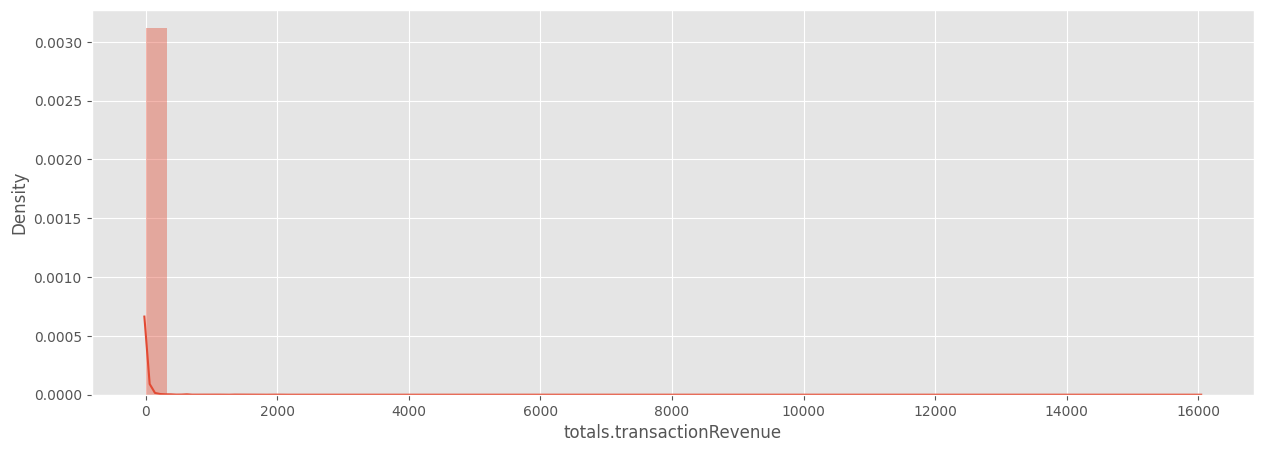

In [567]:
# Distribución de la variable target al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[TARGET]
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\4189099847.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenue', ylabel='Density'>

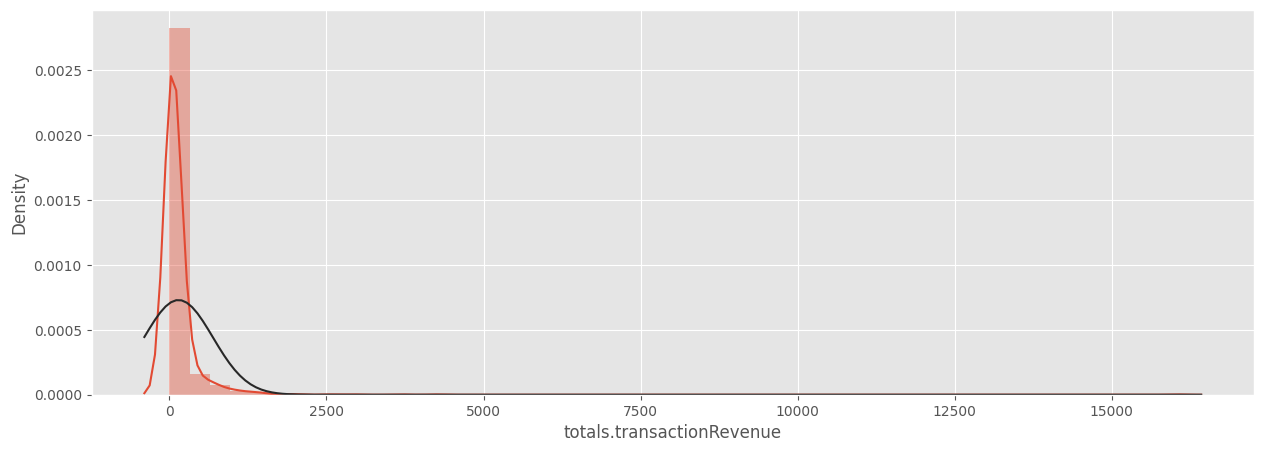

In [568]:
# Distribución de la variable de la gente que compra
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['visitWithTransaction'] == 1][TARGET],
    fit = stats.norm # Nos pinta como debería ser la distribucuión normal
)

In [569]:
df['totals.transactionRevenue'].head()

sessionId
377306020877927890_1472880147     0.0
537222803633850821_1472812602     0.0
9499785259412240342_1472812272    0.0
357659889600827884_1472839882     0.0
3696906537737368442_1472856874    0.0
Name: totals.transactionRevenue, dtype: float64

In [570]:
# Vamos a hacer la tranformación logarítmica mediante el apply

In [571]:
df['totals.transactionRevenueLN'] = df['totals.transactionRevenue'].apply(lambda x: np.log1p(x))

In [572]:
TARGET_LN = 'totals.transactionRevenueLN'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\3760178354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenueLN', ylabel='Density'>

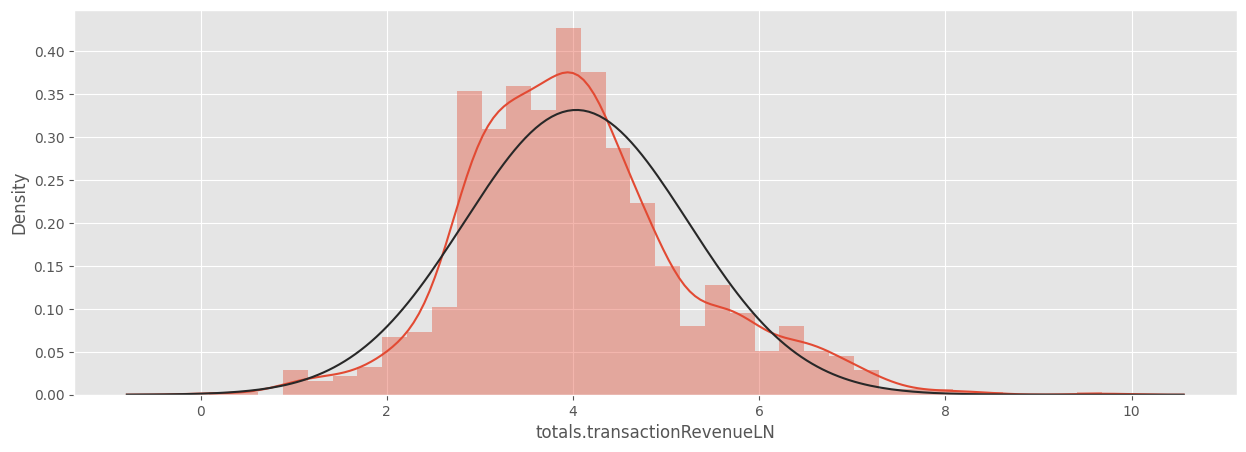

In [573]:
# Distribución de la variable target transformada al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['visitWithTransaction'] == 1][TARGET_LN],
    fit = stats.norm
)

In [574]:
# Ahora vemos que ya sigui una distribución normal. No lo es 100% ya que debería seguir la linea negra, pero ya se acerca mucho más de lo que teníoamso

#### 2.1.9 a 2.1.11 Analisis variables con el target

##### Device - Device Browser

In [575]:
df['device.browser'].describe()

count      90249
unique        32
top       Chrome
freq       62130
Name: device.browser, dtype: object

In [576]:
top_browsers = df['device.browser'].value_counts().head(5)

In [577]:
top_browsers

device.browser
Chrome               62130
Safari               18207
Firefox               3569
Internet Explorer     1930
Edge                  1020
Name: count, dtype: int64

In [578]:
top_browsers_list = top_browsers.index.to_list()

In [579]:
top_browsers_list

['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge']

In [580]:
top_browsers_list.append('Others')

In [581]:
top_browsers_list

['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge', 'Others']

In [582]:
# A continución lo que vamos a hacer con el "Categorical" es que todo lo que no esté en la lista, será nulo, y después
# los nulos los cambiaremos por others

In [583]:
df['device.browser'] = pd.Categorical(df['device.browser'], categories=top_browsers_list)

In [584]:
df['device.browser'].value_counts(dropna=False)

device.browser
Chrome               62130
Safari               18207
Firefox               3569
NaN                   3393
Internet Explorer     1930
Edge                  1020
Others                   0
Name: count, dtype: int64

In [585]:
df['device.browser'].fillna('Others', inplace=True)

In [586]:
df['device.browser'].describe()

count      90249
unique         6
top       Chrome
freq       62130
Name: device.browser, dtype: object

In [587]:
df['device.browser'].value_counts(dropna=False)

device.browser
Chrome               62130
Safari               18207
Firefox               3569
Others                3393
Internet Explorer     1930
Edge                  1020
Name: count, dtype: int64

In [588]:
df['device.browser'].value_counts(normalize=True, dropna=False)  # vaulue_counts tiene una opción que te da el promedio en vez del conteo

device.browser
Chrome               0.688429
Safari               0.201742
Firefox              0.039546
Others               0.037596
Internet Explorer    0.021385
Edge                 0.011302
Name: proportion, dtype: float64

In [589]:
df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET_LN, aggfunc=[len, np.mean])

,len,mean
,totals.transactionRevenueLN,totals.transactionRevenueLN
device.browser,,
Chrome,1065,4.094070
Safari,74,3.500913
Firefox,17,3.802816
Internet Explorer,8,2.911421
Edge,10,3.079891
Others,3,3.981681


In [590]:
_results_df = df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET_LN, aggfunc=[len, np.mean])

In [591]:
_results_df.columns = ['transactions', 'mean_revenue_ln']

In [592]:
_results_df.head()

,transactions,mean_revenue_ln
device.browser,,
Chrome,1065,4.094070
Safari,74,3.500913
Firefox,17,3.802816
Internet Explorer,8,2.911421
Edge,10,3.079891


In [593]:
_results_df['n_rows'] = df['device.browser'].value_counts(dropna=False)

In [594]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows
device.browser,,,
Chrome,1065,4.094070,62130
Safari,74,3.500913,18207
Firefox,17,3.802816,3569
Internet Explorer,8,2.911421,1930
Edge,10,3.079891,1020


In [595]:
_results_df['pct_rows'] = df['device.browser'].value_counts(normalize=True, dropna=False)

In [596]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows,pct_rows
device.browser,,,,
Chrome,1065,4.094070,62130,0.688429
Safari,74,3.500913,18207,0.201742
Firefox,17,3.802816,3569,0.039546
Internet Explorer,8,2.911421,1930,0.021385
Edge,10,3.079891,1020,0.011302


In [597]:
_results_df['pct_transactions'] = _results_df['transactions'] / _results_df['n_rows']

In [598]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows,pct_rows,pct_transactions
device.browser,,,,,
Chrome,1065,4.094070,62130,0.688429,0.017141
Safari,74,3.500913,18207,0.201742,0.004064
Firefox,17,3.802816,3569,0.039546,0.004763
Internet Explorer,8,2.911421,1930,0.021385,0.004145
Edge,10,3.079891,1020,0.011302,0.009804


In [599]:
_results_df = _results_df[['n_rows', 'pct_rows', 'transactions', 'pct_transactions', 'mean_revenue_ln']]

In [600]:
_results_df

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.browser,,,,,
Chrome,62130,0.688429,1065,0.017141,4.094070
Safari,18207,0.201742,74,0.004064,3.500913
Firefox,3569,0.039546,17,0.004763,3.802816
Internet Explorer,1930,0.021385,8,0.004145,2.911421
Edge,1020,0.011302,10,0.009804,3.079891
Others,3393,0.037596,3,0.000884,3.981681


In [601]:
# Conclusiones:
# Análisis para clasificación:
# Chrome reina en las compras, 1,6% de las sesiones de Chrome, compra, del resto de navegadores, vemos que convierten menos.
# Análisis para regresión, hay que hacer un paso más:
# ¿quien se gasta más? Vemos también que la gente que viene de Chrome es quien se gasta más

<Axes: xlabel='device.browser', ylabel='count'>

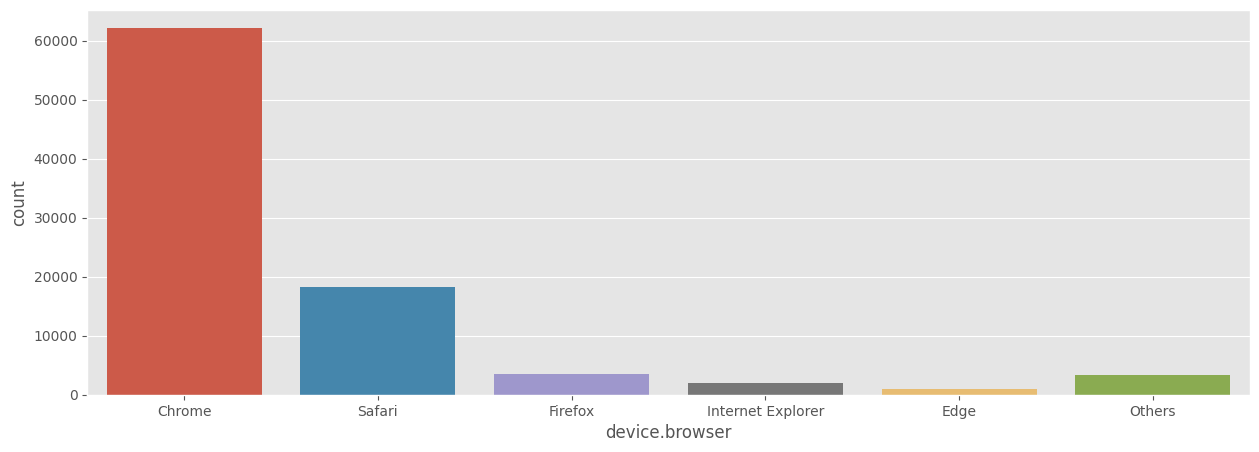

In [602]:
plt.figure(figsize=(15,5))
sns.countplot(
    data = df, x= 'device.browser'
)

<Axes: xlabel='device.browser', ylabel='totals.transactionRevenueLN'>

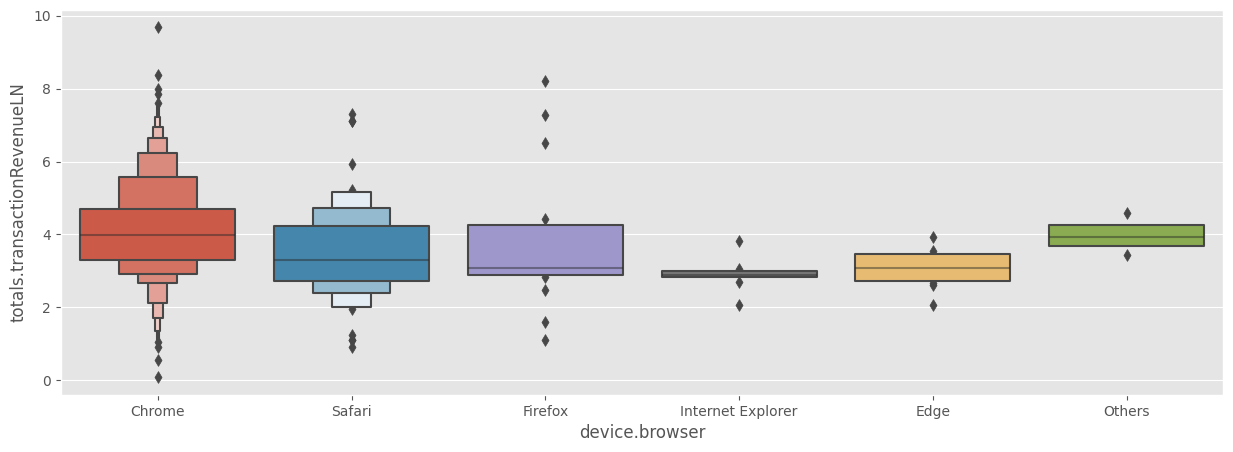

In [603]:
plt.figure(figsize=(15,5))
sns.boxenplot(
    data = df[df['visitWithTransaction'] == 1], 
    x = 'device.browser',
    y = TARGET_LN
)

In [604]:
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        data = dataframe, x = column,
        order = list(dataframe[column].unique())
    )
    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP) 
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    plt.show()


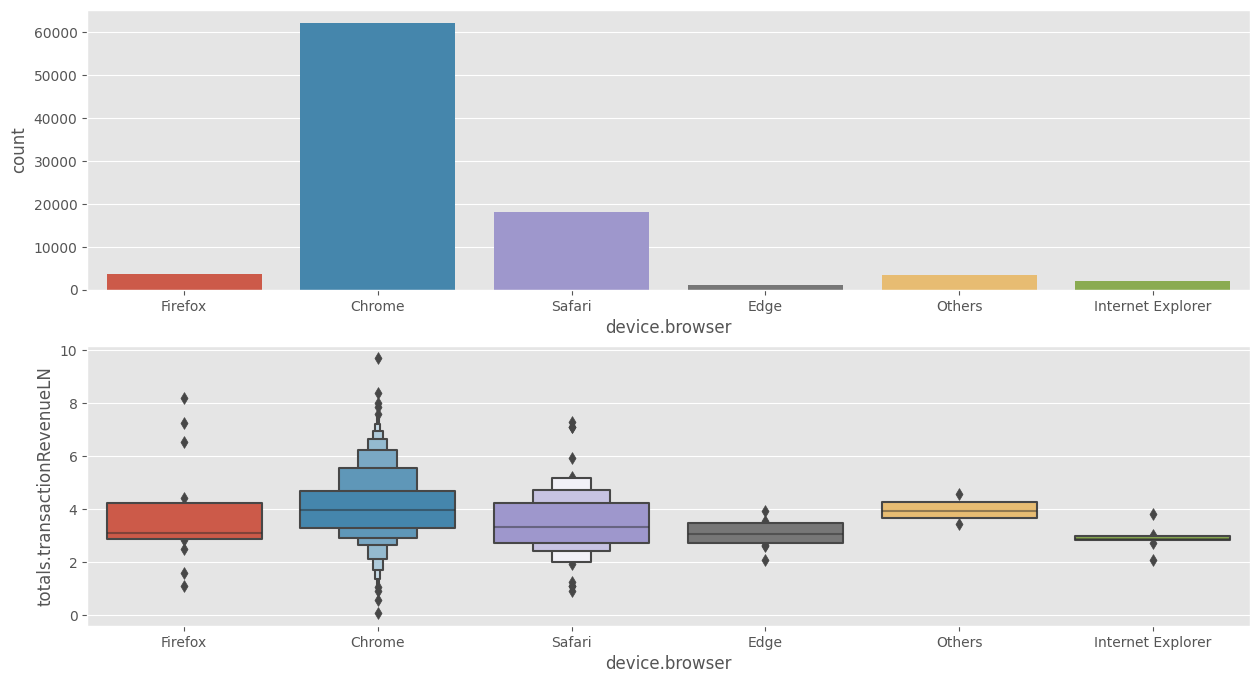

In [605]:
plot_cat_values(df, 'device.browser', TARGET_LN)

In [606]:
def explore_cat_values(dataframe, column, target_column):
    _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean])
    _results_df.columns = ['transactions', 'mean_revenue_ln']
    _results_df['n_rows'] = dataframe[column].value_counts(dropna=False)
    _results_df['pct_rows'] = dataframe[column].value_counts(normalize=True, dropna=False)
    _results_df['pct_transactions'] = _results_df['transactions'] / _results_df['n_rows']
    _results_df = _results_df[['n_rows', 'pct_rows', 'transactions', 'pct_transactions', 'mean_revenue_ln']]
    return _results_df

In [607]:
explore_cat_values(df, 'device.browser', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.browser,,,,,
Chrome,62130,0.688429,1062,0.017093,4.104154
Safari,18207,0.201742,73,0.004009,3.536319
Firefox,3569,0.039546,17,0.004763,3.802816
Internet Explorer,1930,0.021385,8,0.004145,2.911421
Edge,1020,0.011302,10,0.009804,3.079891
Others,3393,0.037596,3,0.000884,3.981681


In [608]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

##### Sistema Operativo

In [609]:
df['device.operatingSystem'].value_counts()

device.operatingSystem
Windows          34835
Macintosh        25592
Android          12428
iOS              10620
Linux             3461
Chrome OS         2671
(not set)          452
Windows Phone      107
BlackBerry          27
Samsung             24
Firefox OS          10
Nintendo Wii         9
Nintendo WiiU        7
Xbox                 6
Name: count, dtype: int64

In [610]:
df['device.operatingSystem'] = setOthers(df, 'device.operatingSystem', 6)

In [611]:
df['device.operatingSystem'].value_counts()

device.operatingSystem
Windows      34835
Macintosh    25592
Android      12428
iOS          10620
Linux         3461
Chrome OS     2671
Others         642
Name: count, dtype: int64

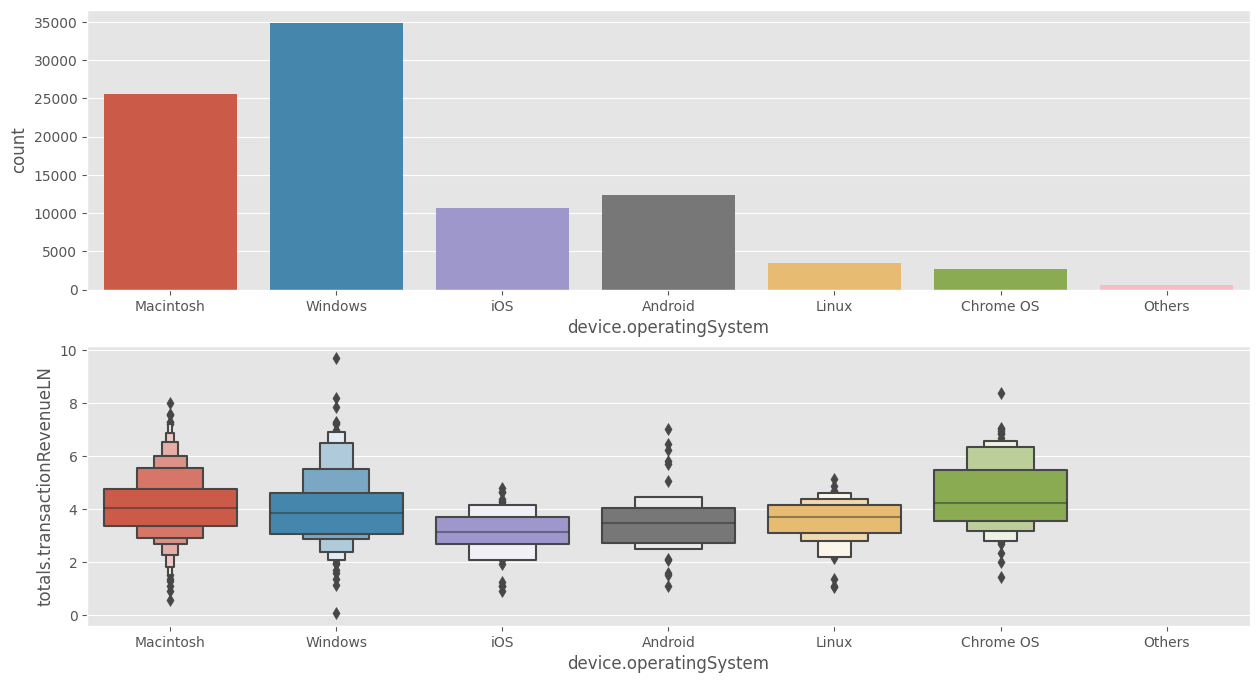

In [612]:
plot_cat_values(df, 'device.operatingSystem', TARGET_LN)

In [613]:
explore_cat_values(df, 'device.operatingSystem', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.operatingSystem,,,,,
Windows,34835,0.385988,246,0.007062,4.008219
Macintosh,25592,0.283571,650,0.025399,4.136659
Android,12428,0.137708,48,0.003862,3.539950
iOS,10620,0.117674,50,0.004708,3.153496
Linux,3461,0.038349,65,0.018781,3.571798
Chrome OS,2671,0.029596,114,0.042681,4.498564
Others,642,0.007114,0,0.000000,NaN


In [614]:
# Conclusiones
# La gente que viene de Mac gasta más y convierte más
# Chrome OS --> gasta más

##### Device - Is Mobile

In [615]:
explore_cat_values(df, 'device.isMobile', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.isMobile,,,,,
False,66496,0.736806,1075,0.016166,4.111491
True,23753,0.263194,98,0.004126,3.342780


In [616]:
# Se observa que en Desktop se hace compra en un mayor porcentaje de ocasiones y el importe es más alto

In [617]:
df['device.isMobile'].dtype

dtype('bool')

In [618]:
df['device.isMobile'] = df['device.isMobile'].astype(int)

In [619]:
df['device.isMobile'].dtype

dtype('int32')

##### Device - Category 

In [620]:
explore_cat_values(df, 'device.deviceCategory', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.deviceCategory,,,,,
desktop,66492,0.736762,1075,0.016167,4.111491
mobile,20743,0.229842,89,0.004291,3.313351
tablet,3014,0.033396,9,0.002986,3.633800


In [621]:
# vemos que esta variable es rediundante respecto a la anterior
# a continuación las comapramos con el crosstab 
# ¿Con cuál de las dos me he de quedar? Con deviceCategory porque ya hace la distinción de mobile o no, también porque cada una de las 
# observaciones tiene suficientes muestras

In [622]:
pd.crosstab(df['device.isMobile'], df['device.deviceCategory'])

device.deviceCategory,desktop,mobile,tablet
device.isMobile,,,
0,66482,13,1
1,10,20730,3013


##### ChannelGrouping

In [623]:
explore_cat_values(df, 'channelGrouping', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
channelGrouping,,,,,
Direct,14178,0.157099,233,0.016434,4.330222
Display,615,0.006814,10,0.016260,4.827975
Organic Search,37993,0.420980,357,0.009396,3.761390
Paid Search,2599,0.028798,45,0.017314,3.935536
Referral,10607,0.117530,519,0.048930,4.110750
Social,22568,0.250064,9,0.000399,4.092178


In [624]:
# Conclusiones:
# referral convierte más.
# Los direct si compran, son los que más se gastan

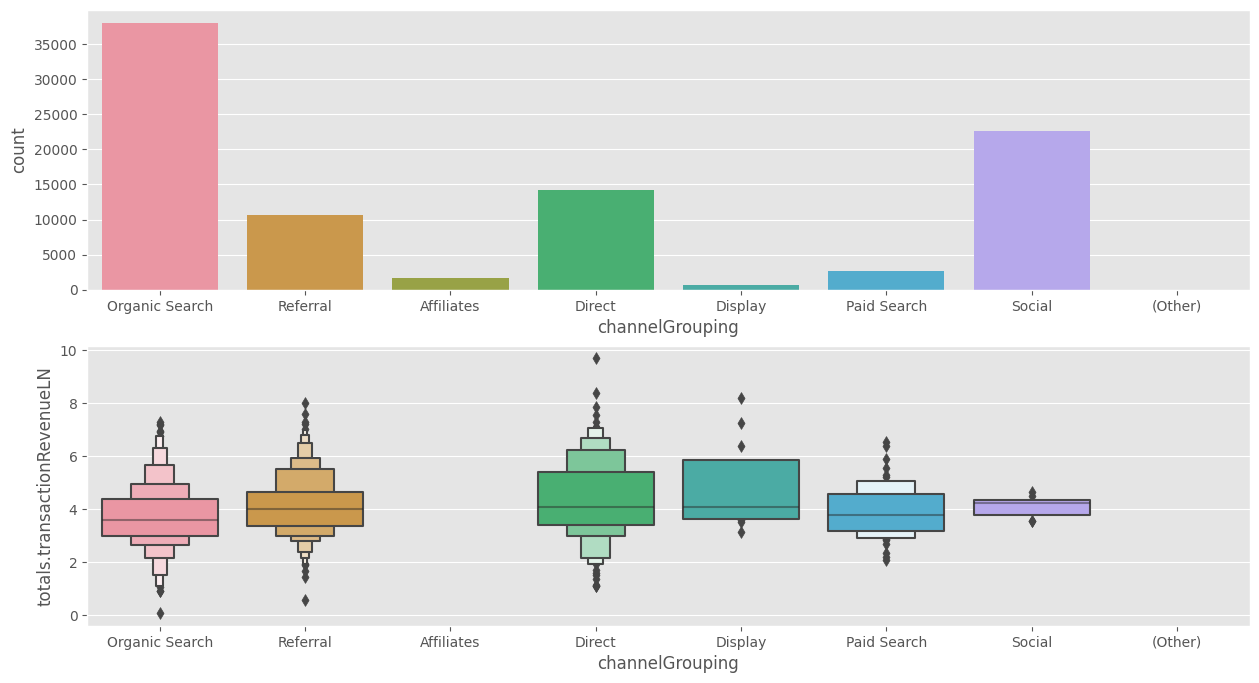

In [625]:
plot_cat_values(df, 'channelGrouping', TARGET_LN)

##### Date

In [626]:
df['date'].describe()

count    9.024900e+04
mean     2.016587e+07
std      4.697879e+03
min      2.016080e+07
25%      2.016103e+07
50%      2.017011e+07
75%      2.017042e+07
max      2.017080e+07
Name: date, dtype: float64

In [627]:
df['date'].head()

sessionId
377306020877927890_1472880147     20160902
537222803633850821_1472812602     20160902
9499785259412240342_1472812272    20160902
357659889600827884_1472839882     20160902
3696906537737368442_1472856874    20160902
Name: date, dtype: int64

In [628]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [629]:
df['date'].head()

sessionId
377306020877927890_1472880147    2016-09-02
537222803633850821_1472812602    2016-09-02
9499785259412240342_1472812272   2016-09-02
357659889600827884_1472839882    2016-09-02
3696906537737368442_1472856874   2016-09-02
Name: date, dtype: datetime64[ns]

In [630]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthDay'] = df['date'].dt.day
df['weekDay'] = df['date'].dt.weekday
df['quarter'] = df['date'].dt.quarter
df['week'] = df['date'].dt.isocalendar().week

In [631]:
df['week'].info()

<class 'pandas.core.series.Series'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Series name: week
Non-Null Count  Dtype 
--------------  ----- 
90249 non-null  UInt32
dtypes: UInt32(1)
memory usage: 3.1+ MB


In [632]:
# Hay que convertir el tipo UInt32 a Int32 ya que el algoritmo Gradient Boosting no lo acpta

In [633]:
df['week'] = df['week'].astype('int32')

In [634]:
df['week'].info()

<class 'pandas.core.series.Series'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Series name: week
Non-Null Count  Dtype
--------------  -----
90249 non-null  int32
dtypes: int32(1)
memory usage: 3.0+ MB


In [635]:
df.head(5).T

sessionId,377306020877927890_1472880147,537222803633850821_1472812602,9499785259412240342_1472812272,357659889600827884_1472839882,3696906537737368442_1472856874
Unnamed: 0,1,7,9,12,19
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472812602,1472812272,1472839882,1472856874
device.browser,Firefox,Chrome,Firefox,Safari,Chrome
device.operatingSystem,Macintosh,Windows,Windows,iOS,Windows
device.isMobile,0,0,0,1,0
device.deviceCategory,desktop,desktop,desktop,mobile,desktop
geoNetwork.continent,Oceania,Oceania,Europe,Asia,Americas


In [636]:
df.drop('date', axis=1, inplace=True)

##### Visit Start Time

In [637]:
df['visitStartTime'].describe()

count    9.024900e+04
mean     1.484998e+09
std      9.021906e+06
min      1.470039e+09
25%      1.477560e+09
50%      1.483901e+09
75%      1.492727e+09
max      1.501657e+09
Name: visitStartTime, dtype: float64

In [638]:
df['visitStartTime'].head()

sessionId
377306020877927890_1472880147     1472880147
537222803633850821_1472812602     1472812602
9499785259412240342_1472812272    1472812272
357659889600827884_1472839882     1472839882
3696906537737368442_1472856874    1472856874
Name: visitStartTime, dtype: int64

In [639]:
# Aqui tenemo un timestamp, nos mide los segundos que han pasado desde una fecha 
#  https://www.epochconverter.com/  

In [640]:
df['visitHour'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [641]:
df.head().T

sessionId,377306020877927890_1472880147,537222803633850821_1472812602,9499785259412240342_1472812272,357659889600827884_1472839882,3696906537737368442_1472856874
Unnamed: 0,1,7,9,12,19
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472812602,1472812272,1472839882,1472856874
device.browser,Firefox,Chrome,Firefox,Safari,Chrome
device.operatingSystem,Macintosh,Windows,Windows,iOS,Windows
device.isMobile,0,0,0,1,0
device.deviceCategory,desktop,desktop,desktop,mobile,desktop
geoNetwork.continent,Oceania,Oceania,Europe,Asia,Americas
geoNetwork.subContinent,Australasia,Australasia,Western Europe,Western Asia,South America


In [642]:
df.drop('visitStartTime', axis=1, inplace=True)

In [643]:
explore_cat_values(df,'visitHour', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
visitHour,,,,,
0,3789,0.041984,60,0.015835,3.849770
1,3507,0.038859,57,0.016253,4.011750
2,3240,0.035901,55,0.016975,3.968651
3,3206,0.035524,58,0.018091,4.159774
4,3202,0.035480,47,0.014678,3.725197
5,3133,0.034715,36,0.011491,3.776613
6,2952,0.032710,32,0.010840,4.019047
7,2918,0.032333,24,0.008225,4.012977
8,2974,0.032953,9,0.003026,3.848471


In [644]:
# Conclusiones
# Podemos ver que la hora es determinante a la hora de comprar
# Vemos que por la tarde es cuando hay más compras y se gasta un poco mas

##### Visit Number

In [645]:
df['visitNumber'].head()

sessionId
377306020877927890_1472880147     1
537222803633850821_1472812602     1
9499785259412240342_1472812272    1
357659889600827884_1472839882     1
3696906537737368442_1472856874    1
Name: visitNumber, dtype: int64

In [646]:
df['visitNumber'].describe()

count    90249.000000
mean         2.241920
std          8.800759
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        393.000000
Name: visitNumber, dtype: float64

<Axes: xlabel='visitNumber', ylabel='totals.transactionRevenueLN'>

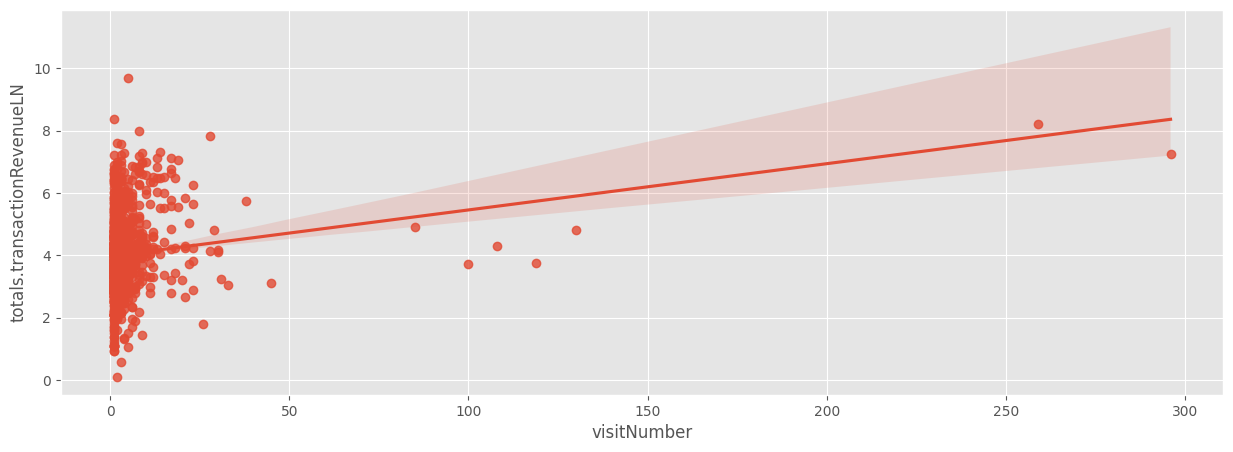

In [647]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='visitNumber',
    y=TARGET_LN
)

In [648]:
# Conclusiones
# parece que a más visitas más gasto? Es así? Para verlo hacemos la correlación
# no hay relación lineal 

In [649]:
df[['visitNumber', TARGET_LN]].head()

,visitNumber,totals.transactionRevenueLN
sessionId,,
377306020877927890_1472880147,1,0.0
537222803633850821_1472812602,1,0.0
9499785259412240342_1472812272,1,0.0
357659889600827884_1472839882,1,0.0
3696906537737368442_1472856874,1,0.0


In [650]:
# Con Pearson no hay relación lineal
df[['visitNumber', TARGET_LN]].corr()

,visitNumber,totals.transactionRevenueLN
visitNumber,1.00000,0.03654
totals.transactionRevenueLN,0.03654,1.00000


In [651]:
# Con spearman están más correlacionadas
df[['visitNumber', TARGET_LN]].corr('spearman')

,visitNumber,totals.transactionRevenueLN
visitNumber,1.00000,0.11404
totals.transactionRevenueLN,0.11404,1.00000


In [652]:
# Lo que haremos será que a VisitNumber, le hacemos la misma transformación logarítmica
# Lo hacempos por que si al final hacemos una regresión lineal, nos interesa que estén lo más correlacionadas con pearson

In [653]:
df['visitNumberLN'] = df['visitNumber'].apply(lambda x: np.log1p(x))

<Axes: xlabel='visitNumberLN', ylabel='totals.transactionRevenueLN'>

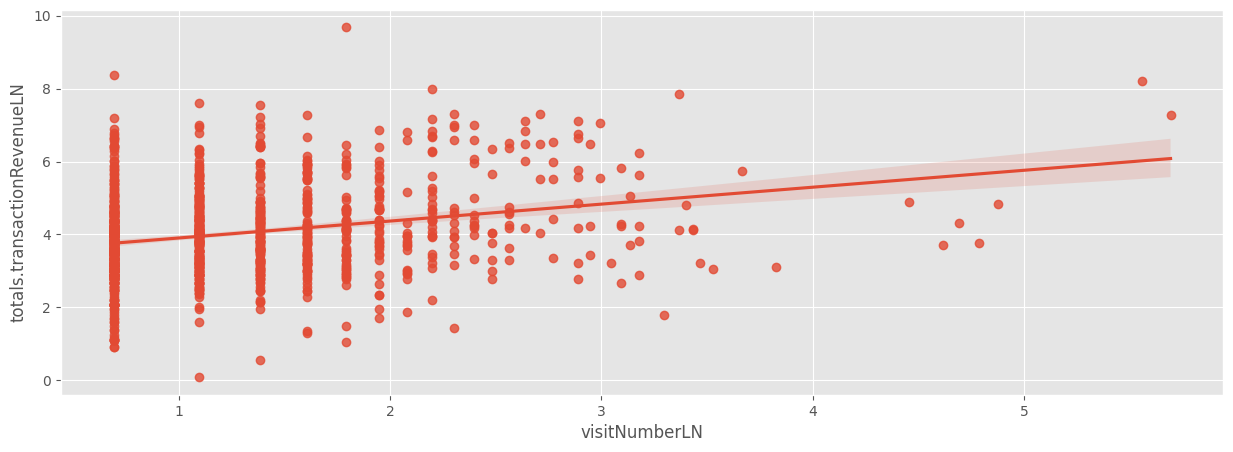

In [654]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='visitNumberLN',
    y=TARGET_LN
)

In [655]:
# Vemos que nos separa las primera observcaiones y los extremos están mucho más juntos
# La distribución se normaliza, las dos variables tienen una distribución normal 

In [656]:
df[['visitNumberLN', TARGET_LN]].corr()

,visitNumberLN,totals.transactionRevenueLN
visitNumberLN,1.000000,0.102183
totals.transactionRevenueLN,0.102183,1.000000


In [657]:
# Ahora nos sale una correlación mayor aunqu no es tan alta como la de spaerman, pero son más parecidas
# A la regresión lineal le va ir mucho mejor pasarle el visitNumber normalizado
# Aunque finalmente hagamos estás tranfomaciones, al decision tree no le va a afectar pero a otros algoritmos si

##### Hits

In [658]:
df['totals.hits'].head(5)

sessionId
377306020877927890_1472880147     1
537222803633850821_1472812602     1
9499785259412240342_1472812272    1
357659889600827884_1472839882     1
3696906537737368442_1472856874    1
Name: totals.hits, dtype: object

In [659]:
df['totals.hits'].describe()

count     90249
unique      162
top           1
freq      44737
Name: totals.hits, dtype: object

In [660]:
df['totals.hits'] = df['totals.hits'].astype(int)

In [661]:
df['totals.hits'].describe()

count    90249.000000
mean         4.572771
std          9.600290
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        500.000000
Name: totals.hits, dtype: float64

In [662]:
# El 500 puede ser un outlier, pero podría ser un bot. Hay que asegurarse
# si con la tranfprmación queda muy lejos y son poquíssimos, vale la pena eliminarlos

<Axes: xlabel='totals.hits', ylabel='totals.transactionRevenueLN'>

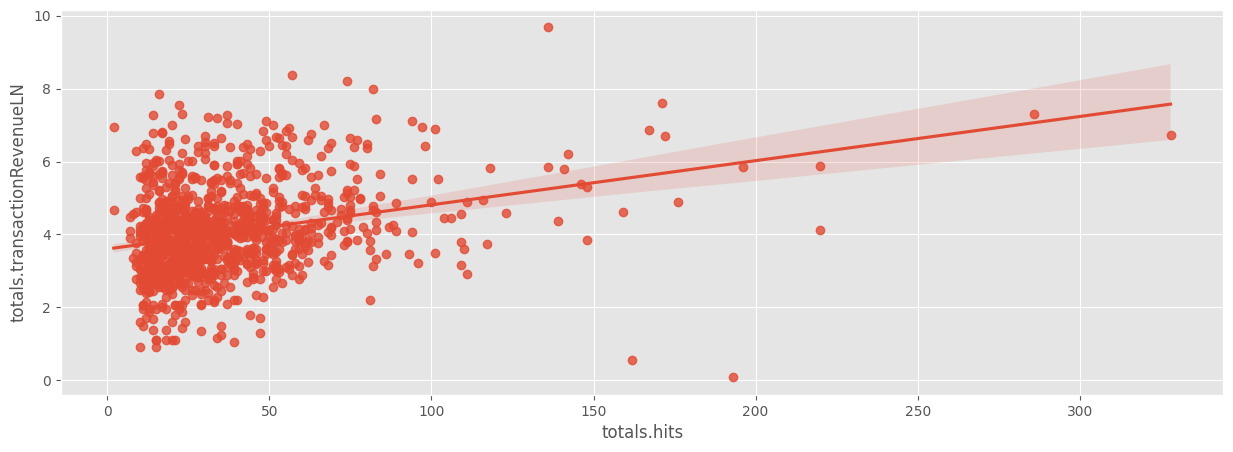

In [663]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='totals.hits',
    y=TARGET_LN
)

In [664]:
df['totals.hitsLN'] = df['totals.hits'].apply(lambda x: np.log1p(x))

<Axes: xlabel='totals.hitsLN', ylabel='totals.transactionRevenueLN'>

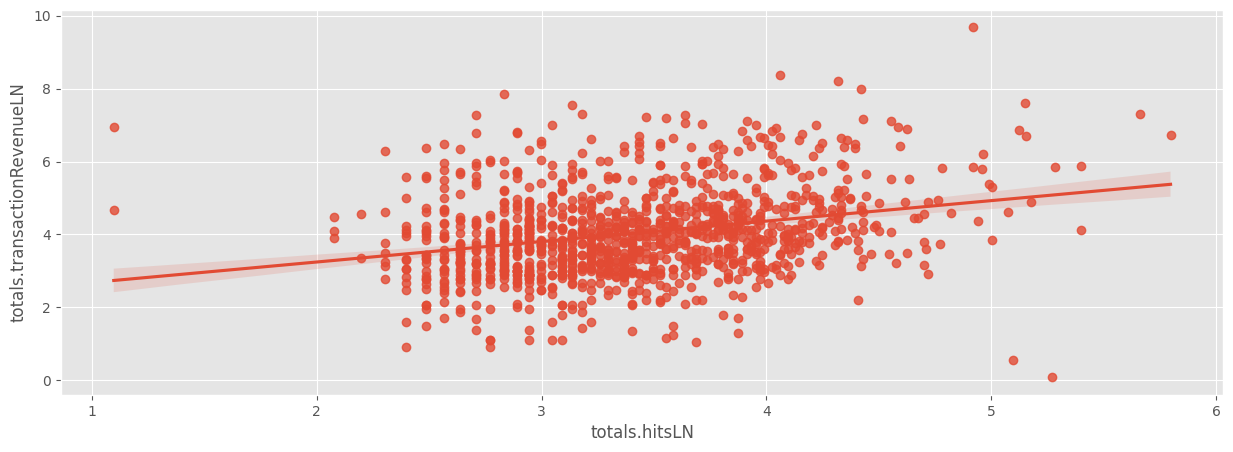

In [665]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='totals.hitsLN',
    y=TARGET_LN
)

In [666]:
# Los outliers que nos preocupaban, ya se ha juntado un poco

In [667]:
df[['totals.hitsLN', TARGET_LN]].corr()

,totals.hitsLN,totals.transactionRevenueLN
totals.hitsLN,1.000000,0.308658
totals.transactionRevenueLN,0.308658,1.000000


In [668]:
# Aqui ya la correlación está muy bien
# Una correlación de más de 0.2, 0.3 ya nos podemos dar por satisfechos

In [669]:
df.pivot_table(index='totals.hits', values='visitWithTransaction', aggfunc=[len, np.sum, np.mean]).head(30)

,len,sum,mean
,visitWithTransaction,visitWithTransaction,visitWithTransaction
totals.hits,,,
1,44737,0,0.000000
2,13787,2,0.000145
3,6909,0,0.000000
4,4198,0,0.000000
5,3199,0,0.000000
6,2304,0,0.000000
7,1944,3,0.001543
8,1551,2,0.001289


##### PageViews

In [670]:
df['totals.pageviews'].head(5)

sessionId
377306020877927890_1472880147     1
537222803633850821_1472812602     1
9499785259412240342_1472812272    1
357659889600827884_1472839882     1
3696906537737368442_1472856874    1
Name: totals.pageviews, dtype: object

In [671]:
# Tiene algún nulo, los ponemos a 0. Podríamos poner un 1 ya que al menos se necista una pageview. Igualmente son muy pocos y valen los 2 valores
df['totals.pageviews'].fillna(0, inplace=True)

In [672]:
df['totals.pageviews'] = df['totals.pageviews'].astype(int)

In [673]:
df['totals.pageviews'].describe()

count    90249.000000
mean         3.833450
std          6.996651
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        333.000000
Name: totals.pageviews, dtype: float64

<Axes: xlabel='totals.pageviews', ylabel='totals.transactionRevenueLN'>

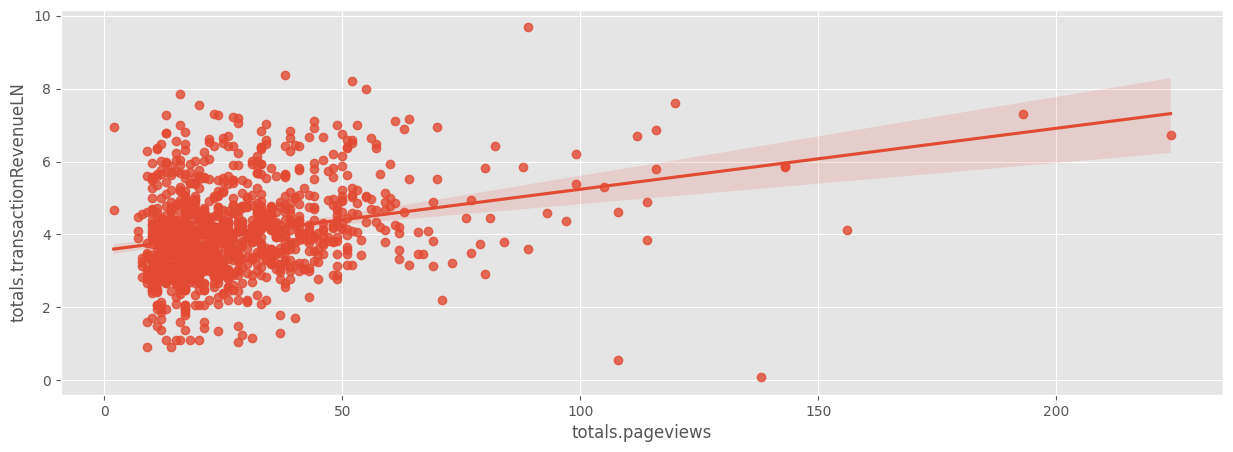

In [674]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='totals.pageviews',
    y=TARGET_LN
)

In [675]:
df['totals.pageviewsLN'] = df['totals.pageviews'].apply(lambda x: np.log1p(x))

<Axes: xlabel='totals.pageviewsLN', ylabel='totals.transactionRevenueLN'>

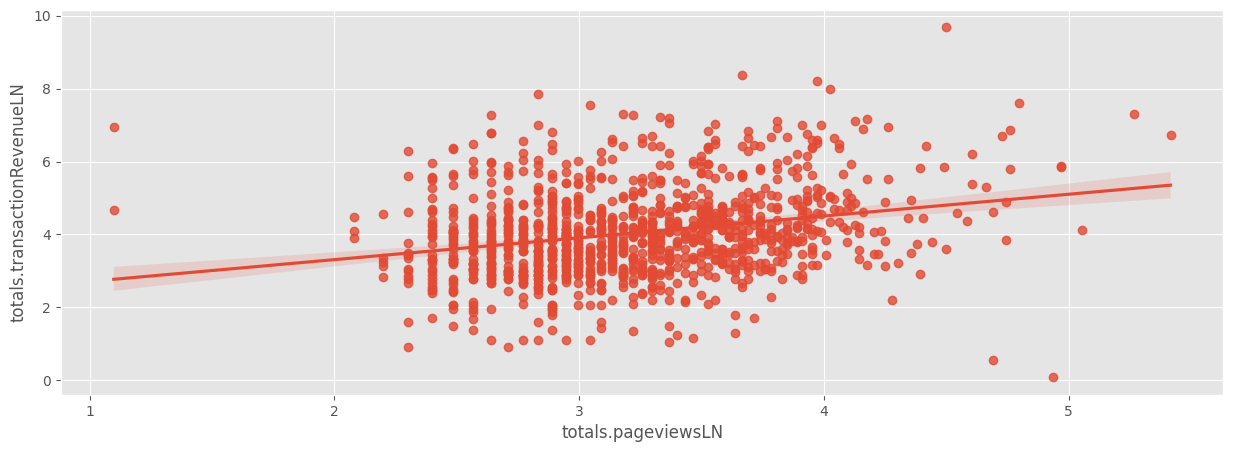

In [676]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='totals.pageviewsLN',
    y=TARGET_LN
)

In [677]:
# Podemos analizar la correlación entre pageViews y Hits 

In [678]:
df[['totals.pageviews', 'totals.hits']].corr()

,totals.pageviews,totals.hits
totals.pageviews,1.000000,0.986006
totals.hits,0.986006,1.000000


In [679]:
# podemos eliminar, ya que a partir de 0.95, 0.96 ya se puede

In [680]:
df.drop('totals.pageviews', axis = 1, inplace = True)

##### GeoNetwork - Continent 

In [681]:
explore_cat_values(df, 'geoNetwork.continent', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.continent,,,,,
Americas,44972,0.498310,1150,0.025571,4.047594
Asia,22414,0.248357,14,0.000625,4.200265
Europe,19627,0.217476,8,0.000408,3.752246
Oceania,1564,0.017330,1,0.000639,3.891208


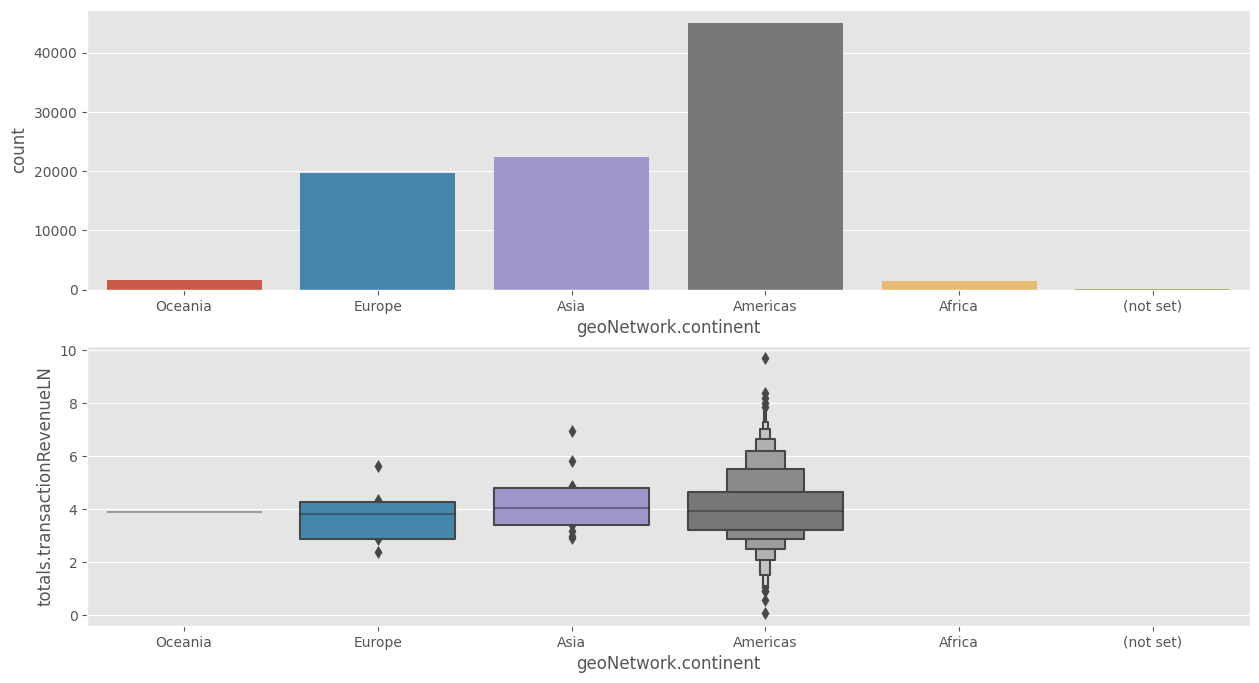

In [682]:
plot_cat_values(df, 'geoNetwork.continent', TARGET_LN)

##### GeoNetwork - SubContinent 

In [683]:
explore_cat_values(df, 'geoNetwork.subContinent', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.subContinent,,,,,
Australasia,1549,0.017164,1,0.000646,3.891208
Caribbean,274,0.003036,2,0.007299,3.834607
Central America,1566,0.017352,2,0.001277,4.215953
Eastern Asia,4691,0.051978,6,0.001279,4.834649
Eastern Europe,4489,0.049740,2,0.000446,3.602458
Northern America,39026,0.432426,1139,0.029186,4.047505
Northern Europe,5788,0.064134,3,0.000518,4.059708
South America,4106,0.045496,7,0.001705,4.074764
Southeast Asia,7842,0.086893,3,0.000383,4.408122


##### GeoNetwork - Country

In [684]:
results_by_country = explore_cat_values(df, 'geoNetwork.country', TARGET_LN)

In [685]:
results_by_country

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.country,,,,,
Brazil,1966,0.021784,2,0.001017,2.406810
Canada,2568,0.028455,21,0.008178,4.051605
Colombia,500,0.005540,2,0.004000,4.003468
Germany,1998,0.022139,1,0.000501,4.248209
Greece,337,0.003734,1,0.002967,3.495901
Guadeloupe,6,0.000066,1,0.166667,3.338613
Hong Kong,460,0.005097,3,0.006522,4.463618
India,5109,0.056610,2,0.000391,3.291962
Ireland,615,0.006814,1,0.001626,2.396986


In [686]:
last_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').head().index.to_list()

In [687]:
last_countries

['Ireland', 'Brazil', 'Russia', 'Spain', 'Turkey']

In [688]:
first_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').tail().index.to_list()

In [689]:
first_countries

['Romania', 'Taiwan', 'Singapore', 'Japan', 'United Kingdom']

In [690]:
country_list = last_countries + first_countries

In [691]:
country_list

['Ireland',
 'Brazil',
 'Russia',
 'Spain',
 'Turkey',
 'Romania',
 'Taiwan',
 'Singapore',
 'Japan',
 'United Kingdom']

In [692]:
def setOthersminmax(dataframe, column, target_column, num_rows_min, top_n):
    results_by_category = explore_cat_values(dataframe, column, target_column)
    last_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').head(top_n).index.to_list()
    first_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').tail(top_n).index.to_list()
    top_categories_list = first_categories + last_categories
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

In [693]:
df['geoNetwork.country'] = setOthersminmax(df, 'geoNetwork.country', TARGET_LN, 500, 5)

In [694]:
df['geoNetwork.country'].value_counts()

geoNetwork.country
Others            74912
United Kingdom     3776
Turkey             2069
Japan              2004
Brazil             1966
Taiwan             1291
Russia             1120
Spain              1119
Singapore           723
Romania             654
Ireland             615
Name: count, dtype: int64

##### geoNetwork - City

In [695]:
explore_cat_values(df, 'geoNetwork.city', TARGET_LN).sort_values(by='mean_revenue_ln')

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.city,,,,,
Sao Paulo,389,0.004310,1,0.002571,1.150572
Dublin,467,0.005175,1,0.002141,2.396986
Tigard,3,0.000033,1,0.333333,2.484073
Istanbul,608,0.006737,1,0.001645,2.915606
Tel Aviv-Yafo,360,0.003989,1,0.002778,2.995232
Fremont,84,0.000931,2,0.023810,3.098332
Ahmedabad,96,0.001064,1,0.010417,3.195812
Pittsburgh,105,0.001163,2,0.019048,3.250367
Minneapolis,14,0.000155,1,0.071429,3.400530


In [696]:
df['geoNetwork.city'] = setOthersminmax(df, 'geoNetwork.city', TARGET_LN, 100, 10)

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   90249 non-null  int64   
 1   channelGrouping              90249 non-null  object  
 2   visitNumber                  90249 non-null  int64   
 3   device.browser               90249 non-null  category
 4   device.operatingSystem       90249 non-null  category
 5   device.isMobile              90249 non-null  int32   
 6   device.deviceCategory        90249 non-null  object  
 7   geoNetwork.continent         90249 non-null  object  
 8   geoNetwork.subContinent      90249 non-null  object  
 9   geoNetwork.country           90249 non-null  category
 10  geoNetwork.region            90249 non-null  object  
 11  geoNetwork.metro             90249 non-null  object  
 12  geoNetwork.c

##### GeoNetwork - Metro

In [698]:
df['geoNetwork.metro'].head(20)

sessionId
377306020877927890_1472880147         not available in demo dataset
537222803633850821_1472812602                             (not set)
9499785259412240342_1472812272        not available in demo dataset
357659889600827884_1472839882                             (not set)
3696906537737368442_1472856874                            (not set)
3293772317640873624_1472808002        not available in demo dataset
1283542838194038522_1472885255        not available in demo dataset
1397786681184924394_1472822131        not available in demo dataset
0715569826025005549_1472864193                            (not set)
3746051970600816343_1472843059    San Francisco-Oakland-San Jose CA
6502220454426138685_1472802450        not available in demo dataset
9271059985757878297_1472838507        not available in demo dataset
0113895825226302532_1472881883                            (not set)
585590266481030647_1472826458                             (not set)
7301951199742758070_1472812062        

In [699]:
df['geoNetwork.metro'].describe()

count                             90249
unique                               82
top       not available in demo dataset
freq                              50610
Name: geoNetwork.metro, dtype: object

In [700]:
explore_cat_values(df, 'geoNetwork.metro', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.metro,,,,,
(not set),20173,0.223526,28,0.001388,4.089560
Atlanta GA,235,0.002604,10,0.042553,4.529603
Austin TX,377,0.004177,18,0.047745,3.814103
Boston MA-Manchester NH,260,0.002881,11,0.042308,3.826383
Charlotte NC,64,0.000709,1,0.015625,5.967326
Chicago IL,797,0.008831,51,0.063990,4.672854
Dallas-Ft. Worth TX,191,0.002116,3,0.015707,4.319748
Denver CO,97,0.001075,8,0.082474,3.917023
Detroit MI,247,0.002737,22,0.089069,4.097004


In [701]:
df.drop('geoNetwork.metro', axis=1, inplace=True)

##### GeoNetwork - Network Domain 

In [702]:
df['geoNetwork.networkDomain'].head()

sessionId
377306020877927890_1472880147            dodo.net.au
537222803633850821_1472812602         bigpond.net.au
9499785259412240342_1472812272             chello.nl
357659889600827884_1472839882        unknown.unknown
3696906537737368442_1472856874    phonevision.com.ar
Name: geoNetwork.networkDomain, dtype: object

In [703]:
df['geoNetwork.networkDomain'].describe()

count         90249
unique         7110
top       (not set)
freq          24439
Name: geoNetwork.networkDomain, dtype: object

In [704]:
df['geoNetwork.networkDomain'].value_counts().head(30)

geoNetwork.networkDomain
(not set)                24439
unknown.unknown          14447
comcast.net               2927
rr.com                    1500
ttnet.com.tr              1369
verizon.net               1325
comcastbusiness.net       1027
hinet.net                  795
virginm.net                657
3bb.co.th                  630
cox.net                    607
prod-infinitum.com.mx      599
sbcglobal.net              575
att.net                    534
btcentralplus.com          524
optonline.net              498
totbb.net                  492
google.com                 476
vnpt.vn                    451
asianet.co.th              445
pldt.net                   401
amazonaws.com              393
rima-tde.net               378
qwest.net                  363
airtelbroadband.in         360
telecomitalia.it           347
t-ipconnect.de             343
bell.ca                    329
virtua.com.br              323
ztomy.com                  276
Name: count, dtype: int64

In [705]:
df['network_net'] = df['geoNetwork.networkDomain'].str.contains('.net', case=False).astype(int)

In [706]:
df['network_com'] = df['geoNetwork.networkDomain'].str.contains('.com', case=False).astype(int)

In [707]:
results_by_network = explore_cat_values(df, 'geoNetwork.networkDomain', TARGET_LN)

In [708]:
results_by_network[results_by_network['n_rows'] > 500]

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
geoNetwork.networkDomain,,,,,
(not set),24439,0.270795,679,0.027783,4.108257
att.net,534,0.005917,2,0.003745,4.119813
comcast.net,2927,0.032432,101,0.034506,4.108337
comcastbusiness.net,1027,0.011380,22,0.021422,4.450700
cox.net,607,0.006726,22,0.036244,4.038737
hinet.net,795,0.008809,1,0.001258,4.615121
rr.com,1500,0.016621,33,0.022000,3.752532
sbcglobal.net,575,0.006371,19,0.033043,3.819059
ttnet.com.tr,1369,0.015169,1,0.000730,2.915606


In [709]:
df['geoNetwork.networkDomain'] = setOthers(df, 'geoNetwork.networkDomain', 10)

##### GeoNetwork - Region

In [710]:
df['geoNetwork.region'].head(10)

sessionId
377306020877927890_1472880147     not available in demo dataset
537222803633850821_1472812602                        Queensland
9499785259412240342_1472812272    not available in demo dataset
357659889600827884_1472839882                             Izmir
3696906537737368442_1472856874                     Buenos Aires
3293772317640873624_1472808002    not available in demo dataset
1283542838194038522_1472885255    not available in demo dataset
1397786681184924394_1472822131    not available in demo dataset
0715569826025005549_1472864193     Santiago Metropolitan Region
3746051970600816343_1472843059                       California
Name: geoNetwork.region, dtype: object

In [711]:
df['geoNetwork.region'].describe()

count                             90249
unique                              339
top       not available in demo dataset
freq                              50610
Name: geoNetwork.region, dtype: object

In [712]:
df.drop('geoNetwork.region', axis=1, inplace=True)

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   90249 non-null  int64   
 1   channelGrouping              90249 non-null  object  
 2   visitNumber                  90249 non-null  int64   
 3   device.browser               90249 non-null  category
 4   device.operatingSystem       90249 non-null  category
 5   device.isMobile              90249 non-null  int32   
 6   device.deviceCategory        90249 non-null  object  
 7   geoNetwork.continent         90249 non-null  object  
 8   geoNetwork.subContinent      90249 non-null  object  
 9   geoNetwork.country           90249 non-null  category
 10  geoNetwork.city              90249 non-null  category
 11  geoNetwork.networkDomain     90249 non-null  category
 12  totals.hits 

In [714]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90249.0,451784.664705,261323.791894,1.000000,225442.000000,451288.000000,677783.000000,903651.000000
visitNumber,90249.0,2.241920,8.800759,1.000000,1.000000,1.000000,1.000000,393.000000
device.isMobile,90249.0,0.263194,0.440369,0.000000,0.000000,0.000000,1.000000,1.000000
totals.hits,90249.0,4.572771,9.600290,1.000000,1.000000,2.000000,4.000000,500.000000
totals.transactionRevenue,90249.0,1.893359,64.527785,0.000000,0.000000,0.000000,0.000000,16023.750000
visitWithTransaction,90249.0,0.013042,0.113454,0.000000,0.000000,0.000000,0.000000,1.000000
totals.transactionRevenueLN,90249.0,0.052631,0.478013,0.000000,0.000000,0.000000,0.000000,9.681890
year,90249.0,2016.515828,0.499752,2016.000000,2016.000000,2017.000000,2017.000000,2017.000000
month,90249.0,6.997873,3.488190,1.000000,4.000000,7.000000,10.000000,12.000000
monthDay,90249.0,15.735443,8.845241,1.000000,8.000000,16.000000,23.000000,31.000000


In [715]:
df.describe(exclude=np.number).T

,count,unique,top,freq
channelGrouping,90249,8,Organic Search,37993
device.browser,90249,6,Chrome,62130
device.operatingSystem,90249,7,Windows,34835
device.deviceCategory,90249,3,desktop,66492
geoNetwork.continent,90249,6,Americas,44972
geoNetwork.subContinent,90249,23,Northern America,39026
geoNetwork.country,90249,11,Others,74912
geoNetwork.city,90249,21,Others,81680
geoNetwork.networkDomain,90249,11,Others,41133
totals.bounces,45130,1,1,45130


## Data preparation

### OHE

In [716]:
# revisamos las categóricas
df.describe(exclude = np.number).T

,count,unique,top,freq
channelGrouping,90249,8,Organic Search,37993
device.browser,90249,6,Chrome,62130
device.operatingSystem,90249,7,Windows,34835
device.deviceCategory,90249,3,desktop,66492
geoNetwork.continent,90249,6,Americas,44972
geoNetwork.subContinent,90249,23,Northern America,39026
geoNetwork.country,90249,11,Others,74912
geoNetwork.city,90249,21,Others,81680
geoNetwork.networkDomain,90249,11,Others,41133
totals.bounces,45130,1,1,45130


In [717]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [718]:
for column in df.select_dtypes(exclude=np.number).columns:
    df = OHE(df, column)

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90249 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 117 entries, Unnamed: 0 to totals.newVisits_1
dtypes: bool(98), float64(5), int32(11), int64(3)
memory usage: 20.4+ MB


In [720]:
df.describe(include=np.number).T.head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90249.0,451784.664705,261323.791894,1.000000,225442.000000,451288.000000,677783.000000,903651.000000
visitNumber,90249.0,2.241920,8.800759,1.000000,1.000000,1.000000,1.000000,393.000000
device.isMobile,90249.0,0.263194,0.440369,0.000000,0.000000,0.000000,1.000000,1.000000
totals.hits,90249.0,4.572771,9.600290,1.000000,1.000000,2.000000,4.000000,500.000000
totals.transactionRevenue,90249.0,1.893359,64.527785,0.000000,0.000000,0.000000,0.000000,16023.750000
visitWithTransaction,90249.0,0.013042,0.113454,0.000000,0.000000,0.000000,0.000000,1.000000
totals.transactionRevenueLN,90249.0,0.052631,0.478013,0.000000,0.000000,0.000000,0.000000,9.681890
year,90249.0,2016.515828,0.499752,2016.000000,2016.000000,2017.000000,2017.000000,2017.000000
month,90249.0,6.997873,3.488190,1.000000,4.000000,7.000000,10.000000,12.000000
monthDay,90249.0,15.735443,8.845241,1.000000,8.000000,16.000000,23.000000,31.000000


### Limpiamos últimas vars

In [721]:
df.drop('Unnamed: 0', axis=1, inplace = True )

## Modelling

In [722]:
# Primer paso el split entre training y validación
# Pero antes recisar las variables que hemos estado utilizando como target
# Hemos de decidir si nos quedamos con el target tal cual, o el target logarítmico
# nos qjoruedamos con el target logarítmico ya que así podemos utilizar el dataset tanto para el algoritmo de regresión lineal como para
# el decision tree. Si solo nos quedaramos con el decision tree, ulizaríamos el target original porque a nivel interpretativo es mejor

In [723]:
target_linked_features = ['totals.transactionRevenue', 'visitWithTransaction']

In [724]:
df.drop(target_linked_features, axis=1, inplace=True)

### Estrategia de validación

In [725]:
# Si tenemos una varible fecha, la utlizaremos para decidir las particiones, si no tendremos que buscar alguna otra variable que nos ayude

In [726]:
df.pivot_table(index=['year', 'month'], values=TARGET_LN, aggfunc=len)

totals.transactionRevenueLN
year month                             
2016 8                             7418
     9                             7134
     10                            9803
     11                           11304
     12                            8037
2017 1                             6506
     2                             6226
     3                             6878
     4                             6598
     5                             6539
     6                             6403
     7                             7138
     8                              265

In [727]:
# Solo tenemo un año de información
# 1. Utilizar los datos más recientes / si es cíclico, lo que se parezca más
# 2. Tener observaciones suficientes en validación minimo más de 2000

In [728]:
# En este caso, utilizaremos los dos últimos meses para validar

In [729]:
df_val = df[df['year'] * 100 + df['month'] >= 201706]
df_dev = df[df['year'] * 100 + df['month'] < 201706]

In [730]:
# hacemmos los de year + 100 pq nos qeuda un formato de número 201708, 201709

In [731]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13806 entries, 1860728728199228303_1498273984 to 9429501400093871691_1499629962
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 2.6+ MB


In [732]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76443 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 14.1+ MB


In [733]:
# Eliminamos el target de las x, y en y solo dajamos el target

In [734]:
df_val_X = df_val.drop(TARGET_LN, axis=1)
df_val_y = df_val[[TARGET_LN]]
df_dev_X = df_dev.drop(TARGET_LN, axis=1)
df_dev_y = df_dev[[TARGET_LN]]

In [735]:
df_val_X.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 13806 entries, 1860728728199228303_1498273984 to 9429501400093871691_1499629962
Columns: 113 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(3), int32(10), int64(2)
memory usage: 2.4+ MB


In [736]:
df_val_y.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 13806 entries, 1860728728199228303_1498273984 to 9429501400093871691_1499629962
Columns: 1 entries, totals.transactionRevenueLN to totals.transactionRevenueLN
dtypes: float64(1)
memory usage: 215.7+ KB


In [737]:
df_dev_X.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 76443 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 113 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(3), int32(10), int64(2)
memory usage: 13.6+ MB


In [738]:
df_dev_y.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 76443 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 1 entries, totals.transactionRevenueLN to totals.transactionRevenueLN
dtypes: float64(1)
memory usage: 1.2+ MB


### Partición train y test

In [739]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_X,
    df_dev_y,
    random_state = RANDOM_STATE,
    test_size = 0.3
)

### Prueba de algoritmos

In [740]:
### Gradient Boosting

In [741]:
# 1 . Instanciamos el modelo

In [742]:
first_model = xgb.XGBRegressor(random_state=42, n_estimators=100, max_depth=4)

In [743]:
# 2 . Entrenamos el modelo

In [744]:
%%time
first_model.fit(X_train, y_train)

CPU times: total: 29.3 s
Wall time: 6.07 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [745]:
# 3 . evaluamos

In [746]:
test_predictions = pd.DataFrame(first_model.predict(X_test), columns=['Prediction'], index=X_test.index)

In [747]:
test_predictions.head(10)

,Prediction
sessionId,
4813739199903315053_1493762891,0.069567
9999906724458612544_1488943249,0.001035
8013426547904286270_1491031969,0.001151
763390296085540505_1487718155,0.000215
4691788681189750512_1484143098,-0.000661
3203628523253204218_1493479713,0.003185
8193460534115066482_1470245848,1.505744
4291809001690748247_1477782689,0.308526
2187855022251183924_1476109172,0.003606


In [748]:
# Hay algo que nos llama la atención, tenemos valores negativos en la predicción
# Es debido a la forma en la que trabaja el gradient boosting, si fureamos finos, habría que canviar los valores negativos por un 0

In [749]:
y_test.head(10)

,totals.transactionRevenueLN
sessionId,
4813739199903315053_1493762891,0.0
9999906724458612544_1488943249,0.0
8013426547904286270_1491031969,0.0
763390296085540505_1487718155,0.0
4691788681189750512_1484143098,0.0
3203628523253204218_1493479713,0.0
8193460534115066482_1470245848,0.0
4291809001690748247_1477782689,0.0
2187855022251183924_1476109172,0.0


In [750]:
results_df = y_test.join(test_predictions)

In [751]:
# Miramos si es capaz de predecir valores alto. Miramos las 10 que más se han gastado
# Predice un valor muy pequeño, tenemos un problema
# La causa es que el dataset está muy desbalanceado
# Vamosa a acabar de evaluar y después desbalancearemos, ya que vemos que no es un buen modelo  


In [752]:
results_df.sort_values(by='totals.transactionRevenueLN', ascending=False).head(10)

,totals.transactionRevenueLN,Prediction
sessionId,,
5632276788326171571_1474035643,9.681890,0.658457
1957458976293878100_1492616459,8.208470,-0.120616
2446685875964479851_1480128186,7.293942,2.901112
244535803596038100_1470682666,7.205286,0.465250
8966130487678127924_1490044345,6.884180,2.703892
1740516675967625074_1484791498,6.779808,0.464468
6010250598436085923_1478263475,6.691860,1.507015
1665883834078021725_1480472776,6.636786,1.995936
5128888224452873031_1475158333,6.592332,1.672718


In [753]:
# según la tabla, tenemos que el registro 244535803596038100_1470682666 en la realidad se gastó 7.205286
# pero el modelo nos dice que se gastó 0.465250
# Vamos a mirar cual es el error de cada predicción
# Hay que recordar que los valores negativos deberían estar en cero

In [754]:
results_df.columns = ['Target', 'Prediction']

In [755]:
results_df['error'] = results_df['Target'] - results_df['Prediction']

In [756]:
results_df.head()

,Target,Prediction,error
sessionId,,,
0000040862739425590_1486836571,0.0,-0.001768,0.001768
0000168159078983594_1474769718,0.0,-0.113925,0.113925
0000702913088027926_1490183009,0.0,0.014546,-0.014546
0002591135526102361_1472265925,0.0,-0.612173,0.612173
0003190859517651877_1487695916,0.0,0.000814,-0.000814


In [757]:
results_df['squared_error'] = results_df['error'] ** 2

In [758]:
results_df['rooted_squared_error'] = np.sqrt(results_df['squared_error'])

In [759]:
results_df.sort_values(by='Target', ascending=False).head()

,Target,Prediction,error,squared_error,rooted_squared_error
sessionId,,,,,
5632276788326171571_1474035643,9.681890,0.658457,9.023433,81.422338,9.023433
1957458976293878100_1492616459,8.208470,-0.120616,8.329086,69.373676,8.329086
2446685875964479851_1480128186,7.293942,2.901112,4.392830,19.296958,4.392830
244535803596038100_1470682666,7.205286,0.465250,6.740036,45.428085,6.740036
8966130487678127924_1490044345,6.884180,2.703892,4.180288,17.474806,4.180288


In [760]:
# el modelo tonto lo utilizamos como referencia en los modelos de regesión para
# En este caso, el modelo tonto es el que predice que se gasta 0
# Y queremos ver en cuanto mejora al mse

In [761]:
mse = results_df['squared_error'].mean()
rmse = results_df['rooted_squared_error'].mean()
mse_modelo_tonto = (results_df['Target'] **2).mean()

In [762]:
print('MSE tonto: {} - MSE: {} - RMSE: {}'.format(mse_modelo_tonto, mse, rmse))

MSE tonto: 0.22530638025825633 - MSE: 0.16685841439642995 - RMSE: 0.07471892707136447


In [763]:
# Lo que vemos es que si hiciesemos un modelo super tonto, tendríamos un error de 0.22
# Nuestro modelo mejora, 0.16, 
# pero no tenemos más datos para saber si es un buen modelo o no, en regresión no tenemos un accuracy con el que comparar
# Ahroa nos fijaremos en que distribución tienen los errores

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\2670984790.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='rooted_squared_error', ylabel='Density'>

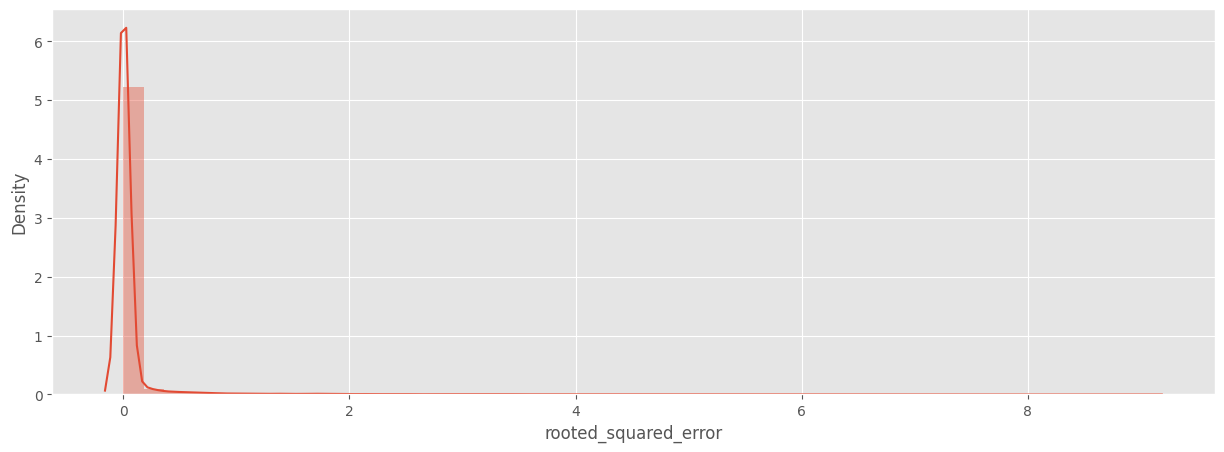

In [764]:
plt.figure(figsize=(15,5))
sns.distplot(
    results_df['rooted_squared_error']
)

In [765]:
# Miramos el error entre la gente que si que compra

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\3089940600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='rooted_squared_error', ylabel='Density'>

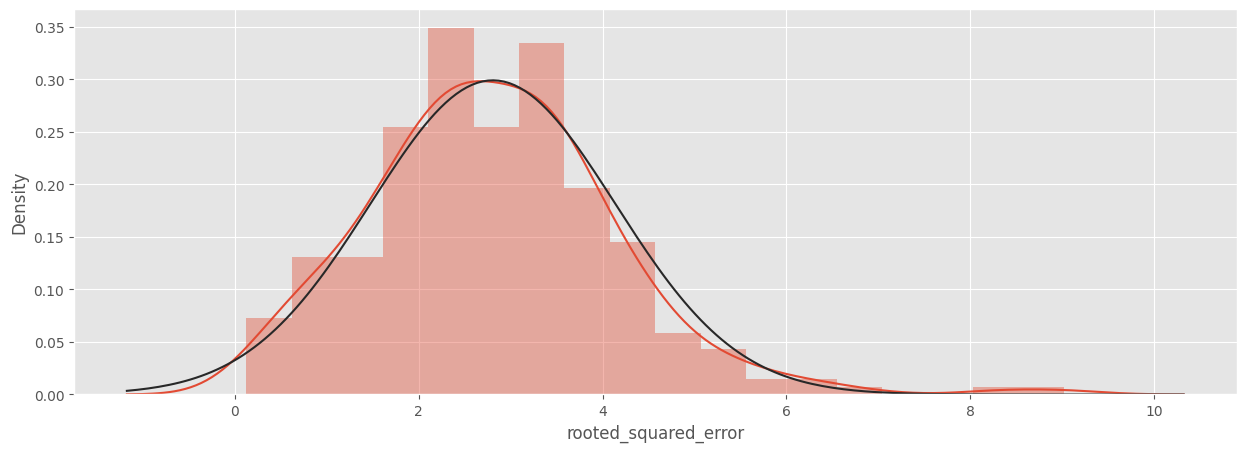

In [766]:
plt.figure(figsize=(15,5))
sns.distplot(
    results_df[results_df['Target'] > 0]['rooted_squared_error'],
    fit=stats.norm
)

In [767]:
# Parece que la distribución sea casi normal
# pero esto no es bueno, ya que lo ideal seria que la gente que compra no se equivocase, pero en la grafica vemos que se equivoca mucho
# Vemos que la equivocación está de media alrededor de 3

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\1509420912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='Target', ylabel='Density'>

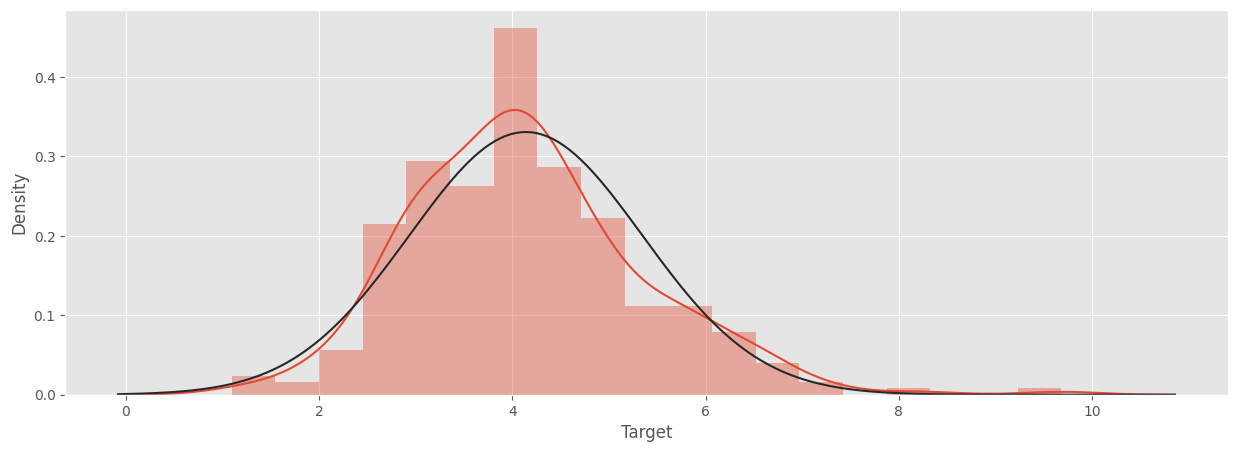

In [768]:
plt.figure(figsize=(15,5))
sns.distplot(
    results_df[results_df['Target'] > 0]['Target'],
    fit=stats.norm
)

In [769]:
# vamos a intentar mejorar
# Lo haremos rebalancando el dataset

In [770]:
# Conclusión
# nuestro modelo predice muy mal en las sesiones que compran (porque son muy pocas). Ademas, entre aquellos que compran,
    # tiende a predecir valores más bajos

#### Vamos a rebalancear el DF

In [771]:
# Vamos a hacer un undersampling
# el rebalanceo NUNCA, NUNCA, NUNCA se hace en validación, ya que validación debe seguir la distribución de la realidad.
# por eso vamos a hacerlo solo en la partición de development

In [772]:
df_dev_zero = df_dev[df_dev[TARGET_LN] == 0]

In [773]:
df_dev_nonzero = df_dev[df_dev[TARGET_LN] > 0]

In [774]:
df_dev_zero.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 75468 entries, 377306020877927890_1472880147 to 2709355455991750775_1483592857
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 14.0+ MB


In [775]:
df_dev_nonzero.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 4755168908070236728_1472849608 to 3301001176863952275_1483599074
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 184.7+ KB


In [776]:
n_nonzeros = len(df_dev_nonzero) * 3

In [777]:
# Equivale a una proporción 25% calse minoritaria 75% calse mayoritaria
n_nonzeros

2925

In [778]:
# sacamos una muestra aleatoria de gente que no ha comprado

In [779]:
df_dev_zero_sample = df_dev_zero.sample(n = n_nonzeros, random_state = RANDOM_STATE)

In [780]:
df_dev_zero_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 228931636295793566_1478132147 to 6801605425985679235_1481645811
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 554.2+ KB


In [781]:
# juntamos

In [782]:
df_dev_sample = pd.concat([df_dev_nonzero, df_dev_zero_sample])

In [783]:
df_dev_sample.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 4755168908070236728_1472849608 to 6801605425985679235_1481645811
Columns: 114 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(4), int32(10), int64(2)
memory usage: 738.9+ KB


In [784]:
df_dev_sample_X = df_dev_sample.drop(TARGET_LN, axis=1)
df_dev_sample_y = df_dev_sample[[TARGET_LN]]

In [785]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_sample_X,
    df_dev_sample_y,
    random_state = RANDOM_STATE,
    test_size = 0.3
)

In [786]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2730 entries, 8134440429521642123_1475843385 to 5246834338019757338_1493360395
Columns: 113 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(3), int32(10), int64(2)
memory usage: 495.9+ KB


In [787]:
y_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2730 entries, 8134440429521642123_1475843385 to 5246834338019757338_1493360395
Columns: 1 entries, totals.transactionRevenueLN to totals.transactionRevenueLN
dtypes: float64(1)
memory usage: 42.7+ KB


In [788]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 8004196057645719276_1483477518 to 9305766004990797685_1492037089
Columns: 113 entries, visitNumber to totals.newVisits_1
dtypes: bool(98), float64(3), int32(10), int64(2)
memory usage: 212.5+ KB


In [789]:
y_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 8004196057645719276_1483477518 to 9305766004990797685_1492037089
Columns: 1 entries, totals.transactionRevenueLN to totals.transactionRevenueLN
dtypes: float64(1)
memory usage: 18.3+ KB


In [790]:
resampled_model = xgb.XGBRegressor(max_depth=4, random_state=RANDOM_STATE, n_estimators=100)

In [791]:
%%time
resampled_model.fit(X_train, y_train)

CPU times: total: 688 ms
Wall time: 422 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [792]:
test_predictions = pd.DataFrame(resampled_model.predict(X_test), index=X_test.index, columns=['Prediction'])

In [793]:
results_df = y_test.join(test_predictions)

In [794]:
results_df.head()

,totals.transactionRevenueLN,Prediction
sessionId,,
8004196057645719276_1483477518,3.769768,5.829037
8115377186419240161_1477858783,0.000000,0.041058
8907488943105277340_1495733252,5.868788,3.811188
9264365728873729602_1492031600,0.000000,-0.116788
7913803297310488543_1491851353,0.000000,-0.023628


In [795]:
results_df.columns = ['Target', 'Prediction']

In [796]:
results_df['error'] = results_df['Target'] - results_df['Prediction']
results_df['squared_error'] = results_df['error'] ** 2
results_df['rooted_squared_error'] = np.sqrt(results_df['squared_error'])
mse = results_df['squared_error'].mean()
rmse = results_df['rooted_squared_error'].mean()

In [797]:
print('MSE: {} - RMSE: {}'.format(mse, rmse))

MSE: 0.8915093081227788 - RMSE: 0.4610030520880401


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\1509420912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='Target', ylabel='Density'>

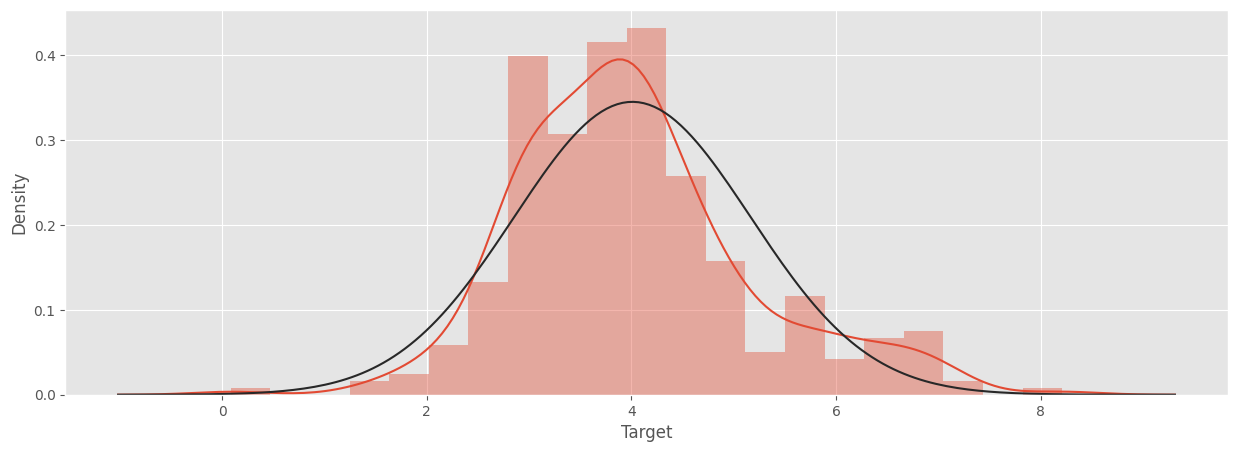

In [798]:
plt.figure(figsize=(15,5))
sns.distplot(
    results_df[results_df['Target'] > 0]['Target'],
    fit=stats.norm
)

In [799]:
results_df.sort_values(by='Target', ascending=False).head(10)

,Target,Prediction,error,squared_error,rooted_squared_error
sessionId,,,,,
1957458976293878100_1492616459,8.208470,4.295655,3.912815,15.310123,3.912815
244535803596038100_1470682666,7.205286,3.850558,3.354728,11.254201,3.354728
9089132392240687728_1487983484,7.106893,3.847299,3.259594,10.624951,3.259594
9127648314670892401_1489182024,7.007601,4.875546,2.132055,4.545659,2.132055
7463172420271311409_1487119304,7.003593,4.001448,3.002145,9.012874,3.002145
244535803596038100_1475077100,6.910342,4.019056,2.891286,8.359535,2.891286
9519453598438934808_1485117971,6.864378,7.737606,-0.873228,0.762526,0.873228
7284466025557220497_1478027982,6.842288,5.265624,1.576665,2.485872,1.576665
4076862635585033778_1484077031,6.815859,3.217979,3.597880,12.944741,3.597880


In [800]:
# Con el dataset rebalanceado, consigo predecir mejor entre aquellos que si me compran
# de media hago menos errores
# y llega a prdecir valores más altos que antes

#### Cerramos el modelo con el DF de validación

In [801]:
val_predictions = pd.DataFrame(resampled_model.predict(df_val_X), index=df_val_X.index, columns=['Prediction'])

In [802]:
val_results_df = df_val_y.join(val_predictions)

In [803]:
val_results_df.head()

,totals.transactionRevenueLN,Prediction
sessionId,,
1860728728199228303_1498273984,0.0,-0.058517
8465195671786100100_1498229838,0.0,0.027145
8657607224395495904_1498241029,0.0,-0.045181
5719261654923273716_1498211106,0.0,0.121308
0897633521928502620_1498217501,0.0,-0.019892


In [804]:
val_results_df.columns = ['Target', 'Prediction']

In [805]:
val_results_df['error'] = val_results_df['Target'] - val_results_df['Prediction']
val_results_df['squared_error'] = val_results_df['error'] ** 2
val_results_df['rooted_squared_error'] = np.sqrt(val_results_df['squared_error'])
mse = val_results_df['squared_error'].mean()
rmse = val_results_df['rooted_squared_error'].mean()

In [806]:
print('MSE: {} - RMSE: {}'.format(mse, rmse))

MSE: 0.4761973869174222 - RMSE: 0.25020709928095103


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\4183609881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='rooted_squared_error', ylabel='Density'>

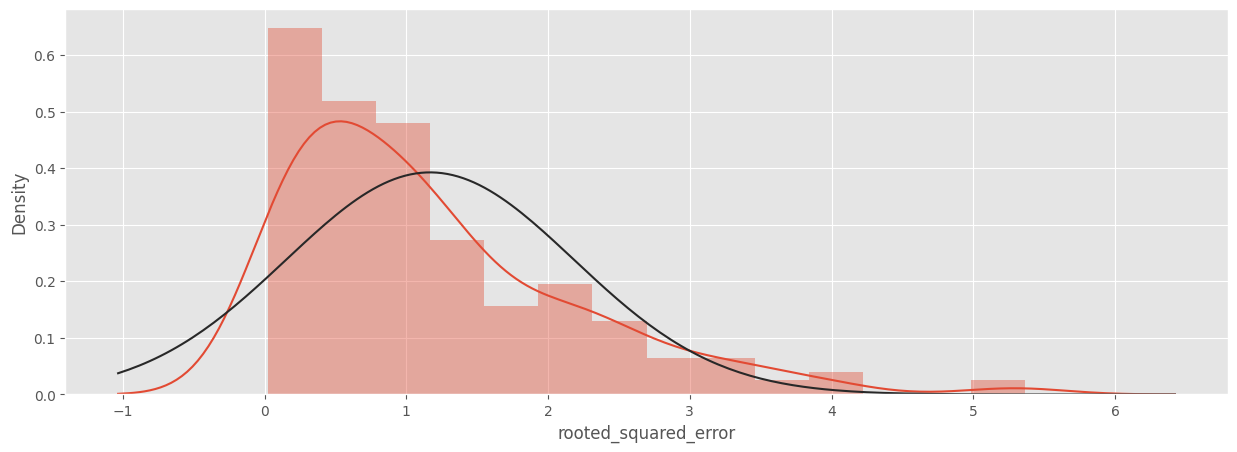

In [807]:
plt.figure(figsize=(15,5))
sns.distplot(
    val_results_df[val_results_df['Target'] > 0]['rooted_squared_error'],
    fit=stats.norm
)

## Regresión lineal

In [808]:
# A modo de prueba, testeamos el modelo de regresión lineal. 
# Sin embargo, hay incluidas algunas variables con outliers que pueden perjudicar mucho al modelo.

In [809]:
# Hay que eliminar las variables extras que no estan transformadas: totals.hits, totals.visitNumber

In [810]:
non_normal_attributes = ['totals.hits', 'visitNumber']

In [811]:
X_train_LR = X_train.drop(non_normal_attributes, axis = 1)

In [812]:
df_val_X_LR = df_val_X.drop(non_normal_attributes, axis = 1)

In [813]:
from sklearn.linear_model import LinearRegression

In [814]:
resampled_model_lin_reg = LinearRegression()

In [815]:
%%time
resampled_model_lin_reg.fit(X_train_LR, y_train)

CPU times: total: 15.6 ms
Wall time: 40.4 ms


LinearRegression()

In [816]:
val_predictions_lin_reg = pd.DataFrame(resampled_model_lin_reg.predict(df_val_X_LR), index=df_val_X_LR.index, columns=['Prediction'])

In [817]:
val_results_df_linreg = df_val_y.join(val_predictions_lin_reg)

In [818]:
#algunas predicciones de la regresion lineal salen fuera del rango. Por ejemplo, la predicción el la fila 5

In [819]:
val_results_df_linreg.head()

,totals.transactionRevenueLN,Prediction
sessionId,,
1860728728199228303_1498273984,0.0,-0.395176
8465195671786100100_1498229838,0.0,-0.105846
8657607224395495904_1498241029,0.0,0.168423
5719261654923273716_1498211106,0.0,0.277531
0897633521928502620_1498217501,0.0,-0.186062


In [820]:
val_results_df_linreg.columns = ['Target', 'Prediction']

In [821]:
val_results_df_linreg['error'] = val_results_df_linreg['Target'] - val_results_df_linreg['Prediction']
val_results_df_linreg['squared_error'] = val_results_df_linreg['error'] ** 2
val_results_df_linreg['rooted_squared_error'] = np.sqrt(val_results_df_linreg['squared_error'])
mse_linreg = val_results_df_linreg['squared_error'].mean()
rmse_linreg = val_results_df_linreg['rooted_squared_error'].mean()

In [822]:
print('MSE: {} - RMSE: {}'.format(mse_linreg, rmse_linreg))

MSE: 2523327786980494.5 - RMSE: 1060002.487342666


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7240\3291953600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='rooted_squared_error', ylabel='Density'>

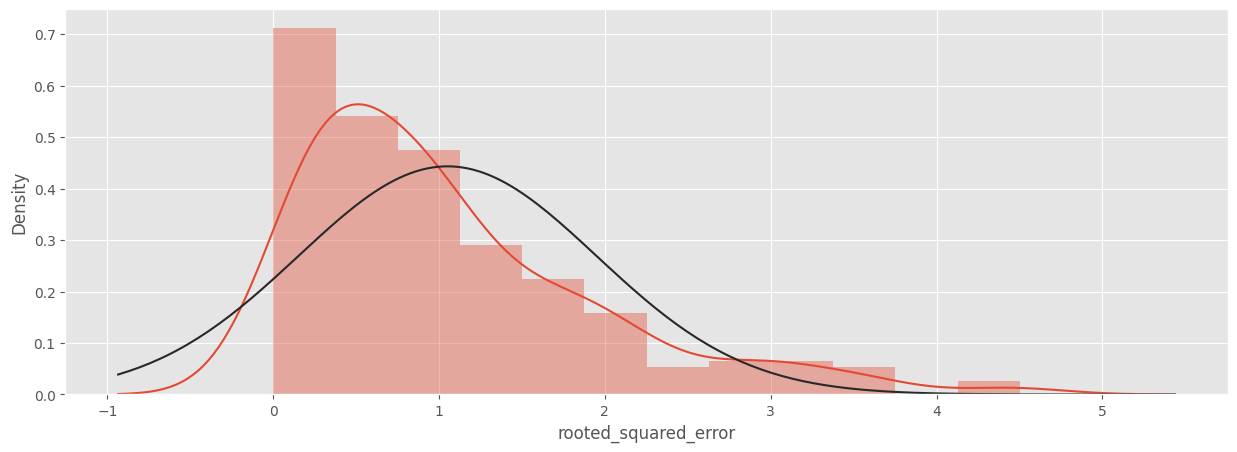

In [823]:
plt.figure(figsize=(15,5))
sns.distplot(
    val_results_df_linreg[val_results_df_linreg['Target'] > 0]['rooted_squared_error'],
    fit=stats.norm
)